# Identify start - end attack

## Keypoints loading

In [10]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive


%matplotlib inline

In [11]:
df = pd.read_csv('./data/Kaggle/ClipDescriptorKaggle.csv')

In [12]:
df.head()

,id,ClipName,URL,Start_frame,End_frame,Light1,Light2,Hit_label
0,1,0001_002_00_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,22750.0,22825.0,2,2,0-0-1
1,2,0001_002_00_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,24684.0,24759.0,2,2,1-0-0
2,3,0001_002_01_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,27330.0,27405.0,2,1,1-0-0
3,4,0001_002_01_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,28051.0,28126.0,2,2,0-0-1
4,5,0001_002_02_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,34040.0,34115.0,2,2,0-0-1


In [13]:
print("{} different clips".format(len(df.ClipName.unique())))

9370 different clips


In [14]:
def load_key_point(path):
    with open(path, 'r') as fh:
        df_kp = json.load(fh)
    res = [np.array(el) for el in df_kp]
    return [el for el in res if el.ndim == 3]

df_kp = load_key_point('./data/Kaggle/FencersKeyPoints/0006_028_00_04_1.json')

## Visualize

In [15]:
def plot_key_points(X, ax):
    mask = X[0].mean(axis=1) > 1
    ax.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    mask = X[1].mean(axis=1) > 1
    ax.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(230, 0)
    
def plot_key_point_sequence(idx):
    fig, ax = plt.subplots()
    plot_key_points(df_kp[int(idx)], ax)
    plt.show()


interactive_plot = interactive(plot_key_point_sequence, idx=(0, len(df_kp)-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=33, description='idx', max=67), Output(layout=Layout(height='350px'))), …

## Display all images of same clip

In [16]:
def plot_key_points(X, ax):
    mask = X[0].mean(axis=1) > 1
    ax.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    mask = X[1].mean(axis=1) > 1
    ax.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(230, 0)


def plot_all_from_clip(df_kp):
    idx = 0
    for row in range(N_row):
        for col in range(N_col):
            ax = axs[row][col]
            try:
                plot_key_points(df_kp[idx], ax)
                ax.set_title(str(idx), loc="center")
                #ax.set_axis("off")
            except:
                pass
            idx += 1

0001_002_00_01_1


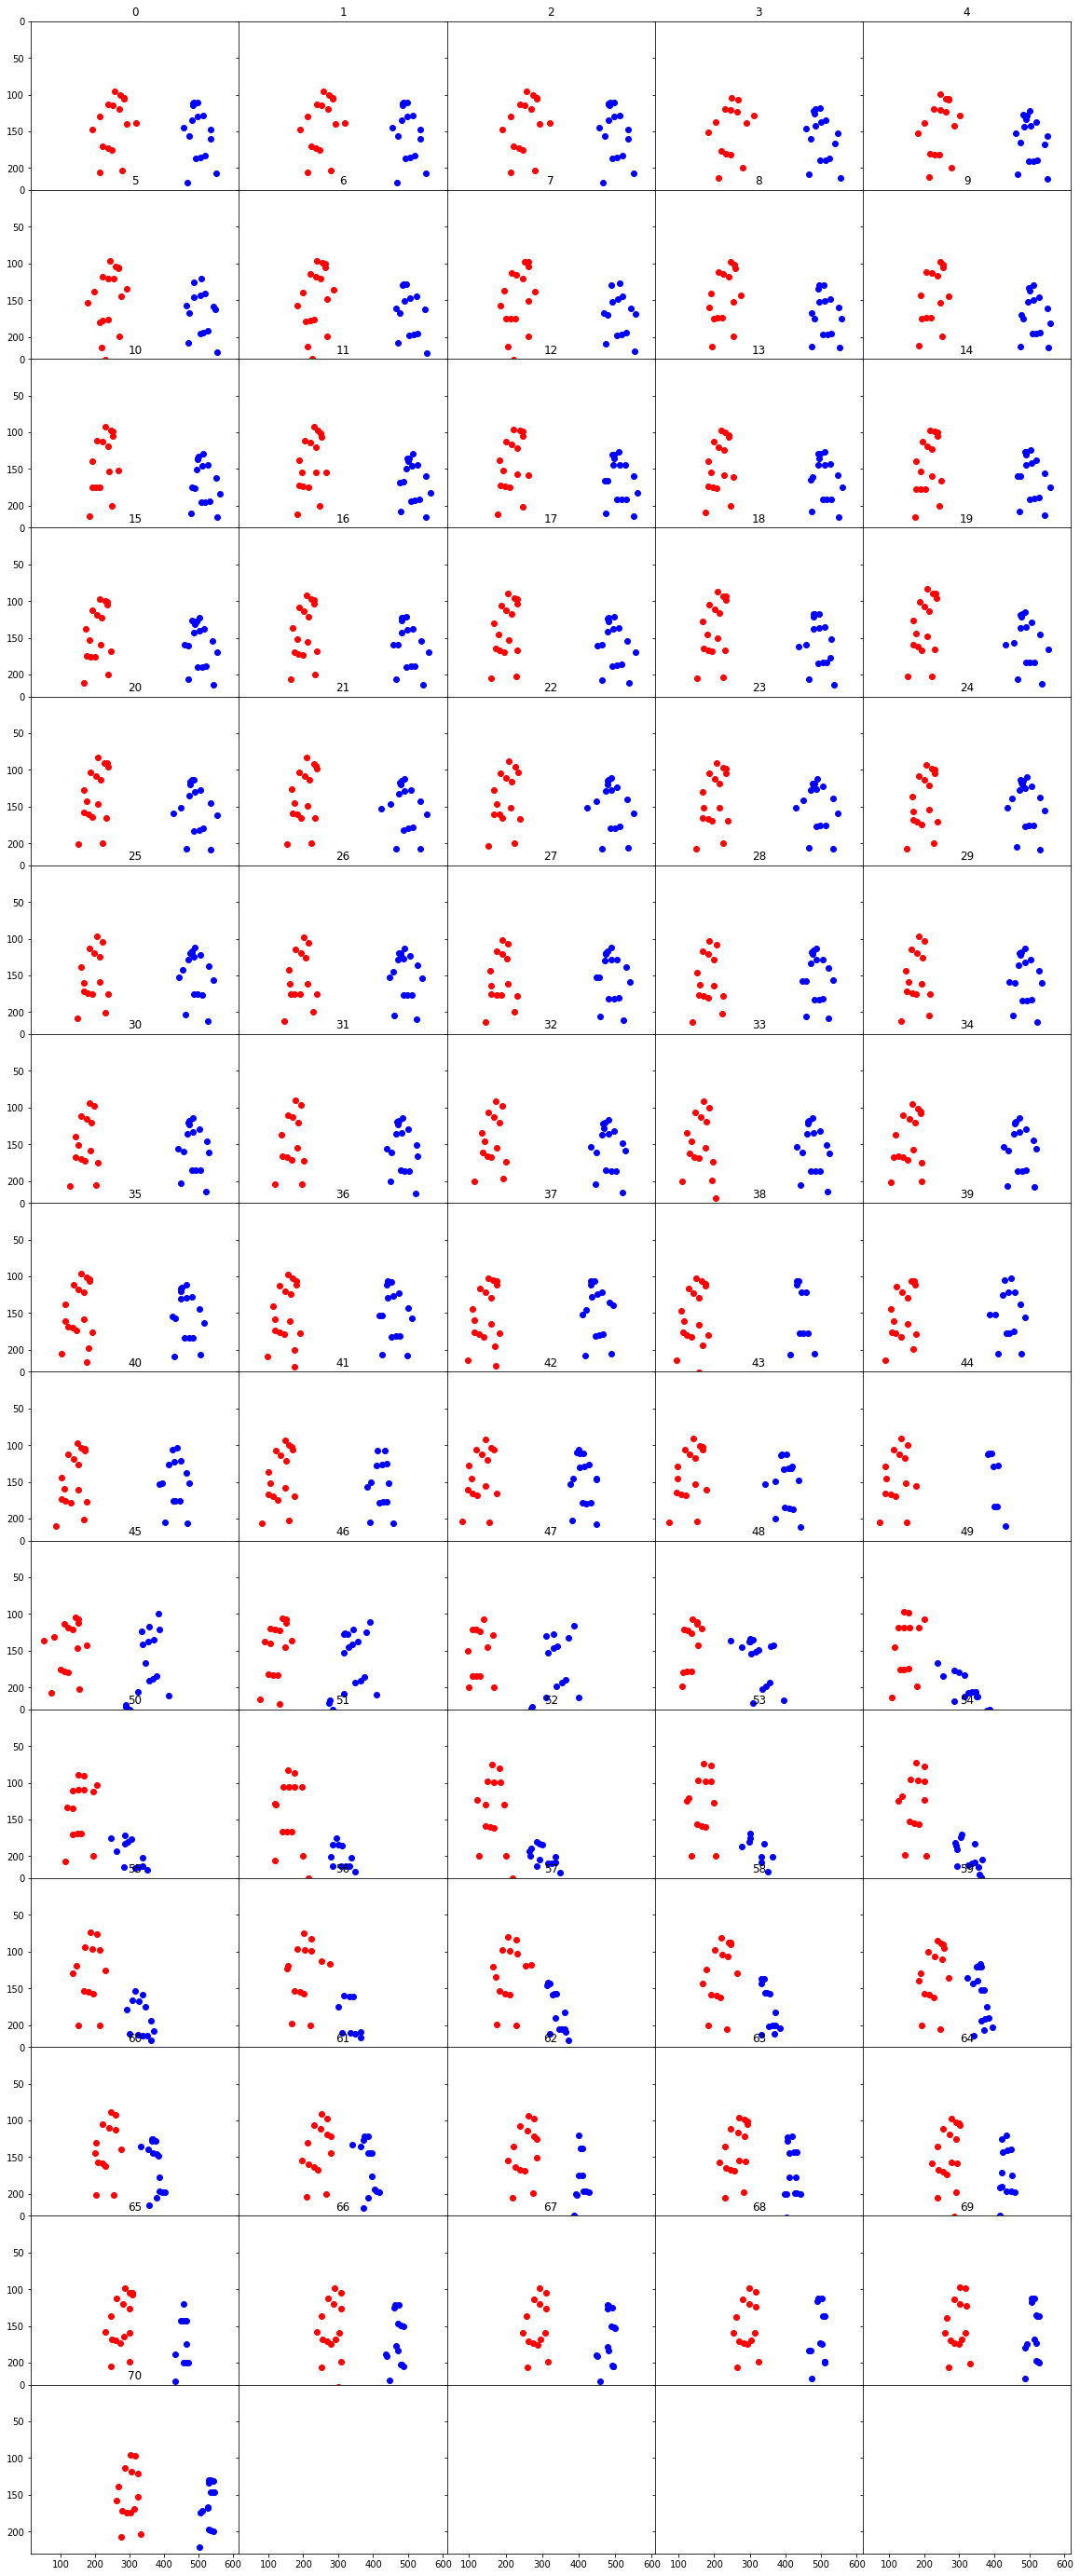

idx of start attack ?49
idx of end attack ?48
who initiates attack ? (left or right)right


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

0001_002_00_02_1


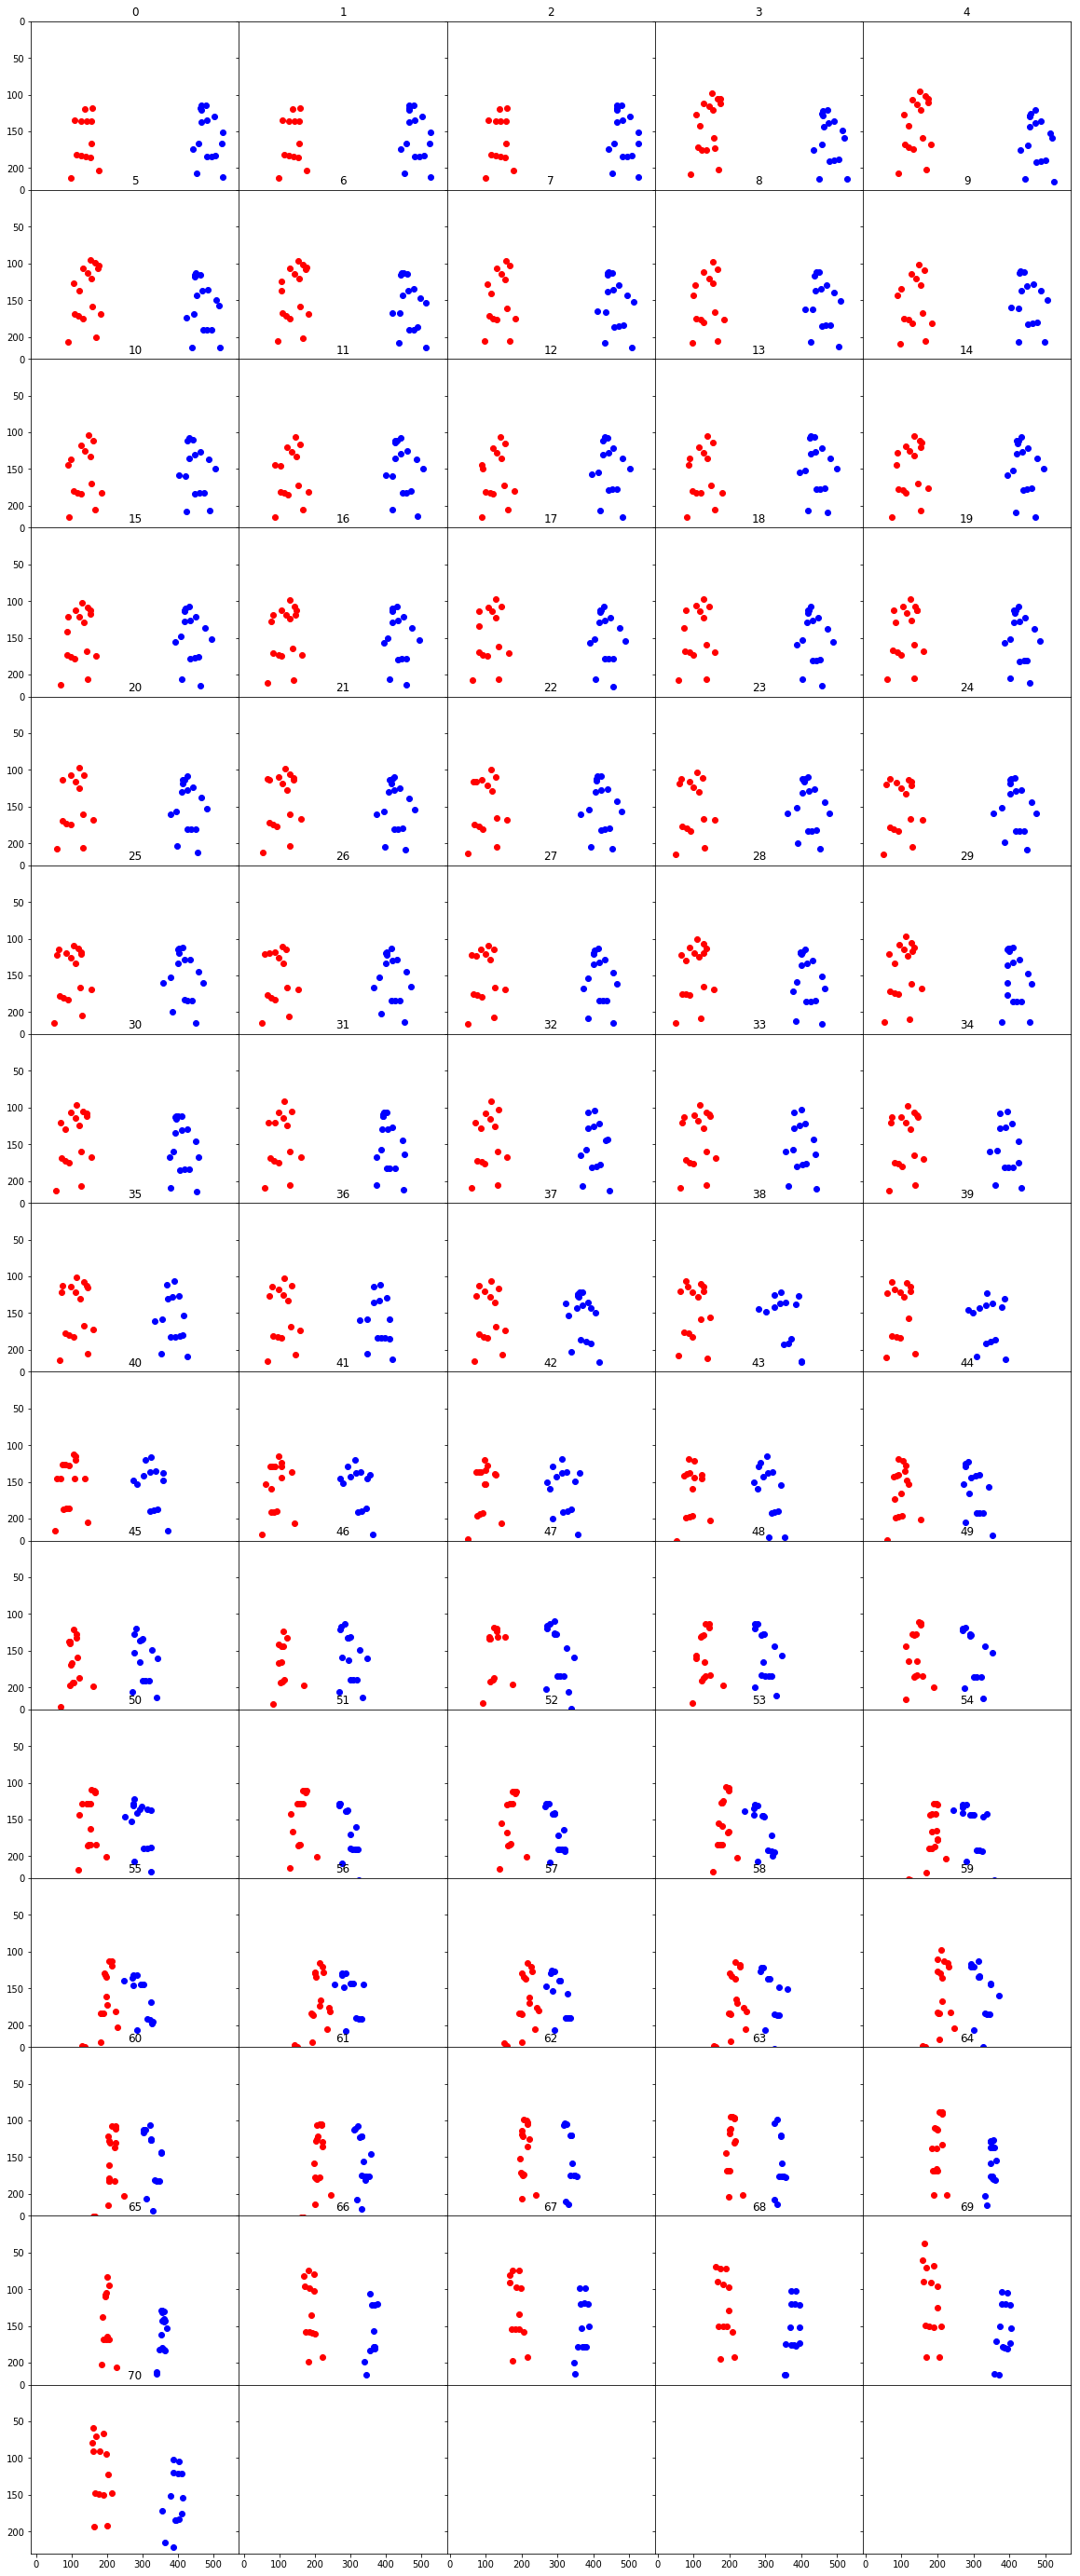

idx of start attack ?0
idx of end attack ?0
who initiates attack ? (left or right)0
0001_002_01_01_1


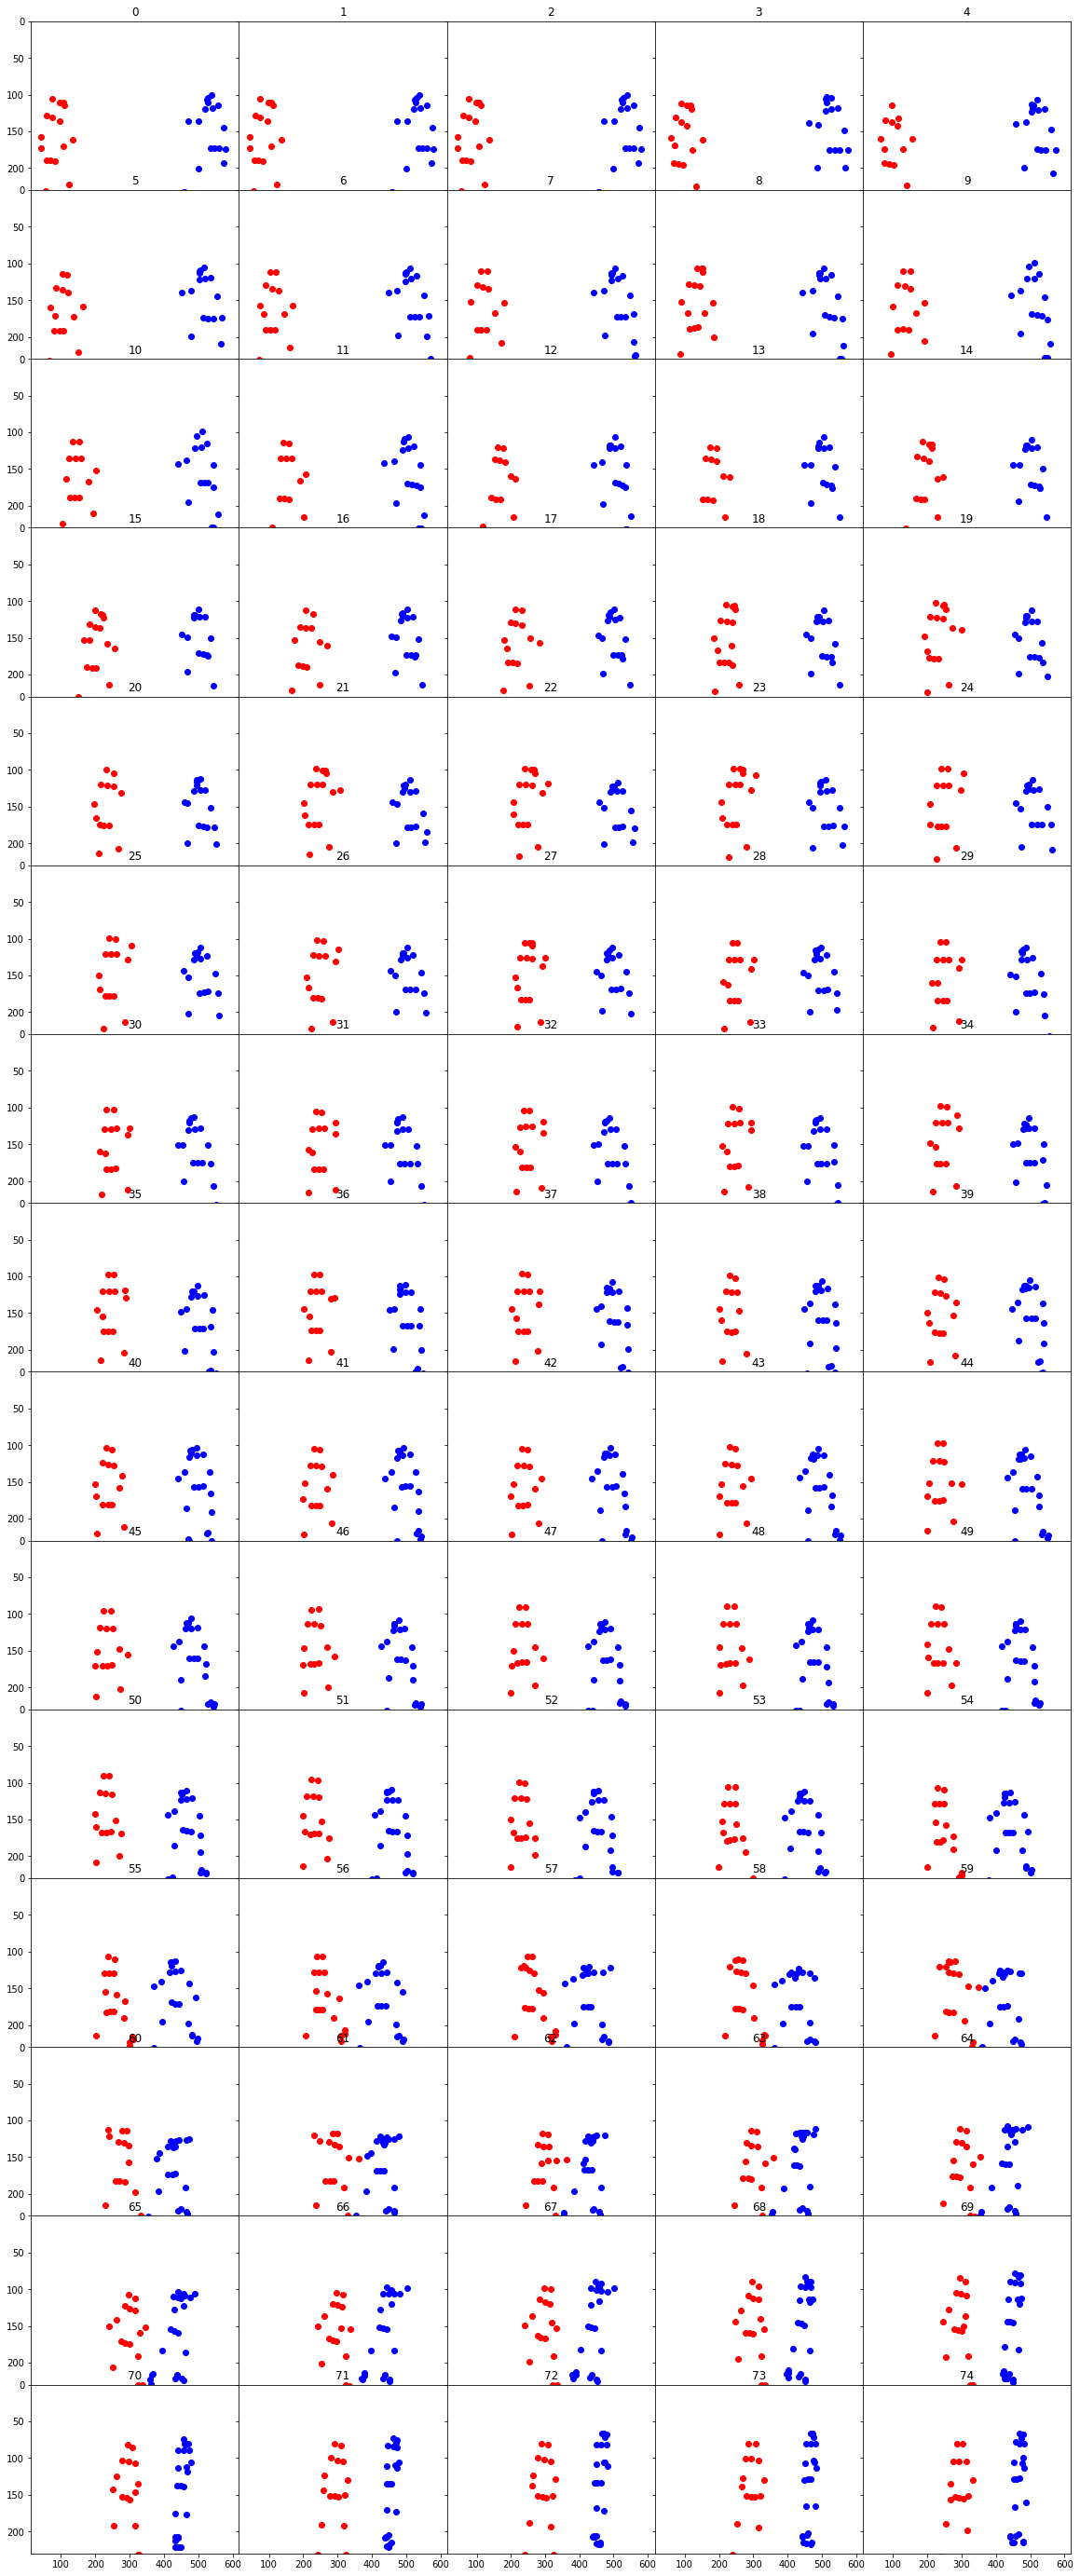

idx of start attack ?0
idx of end attack ?0
who initiates attack ? (left or right)0
0001_002_01_02_1


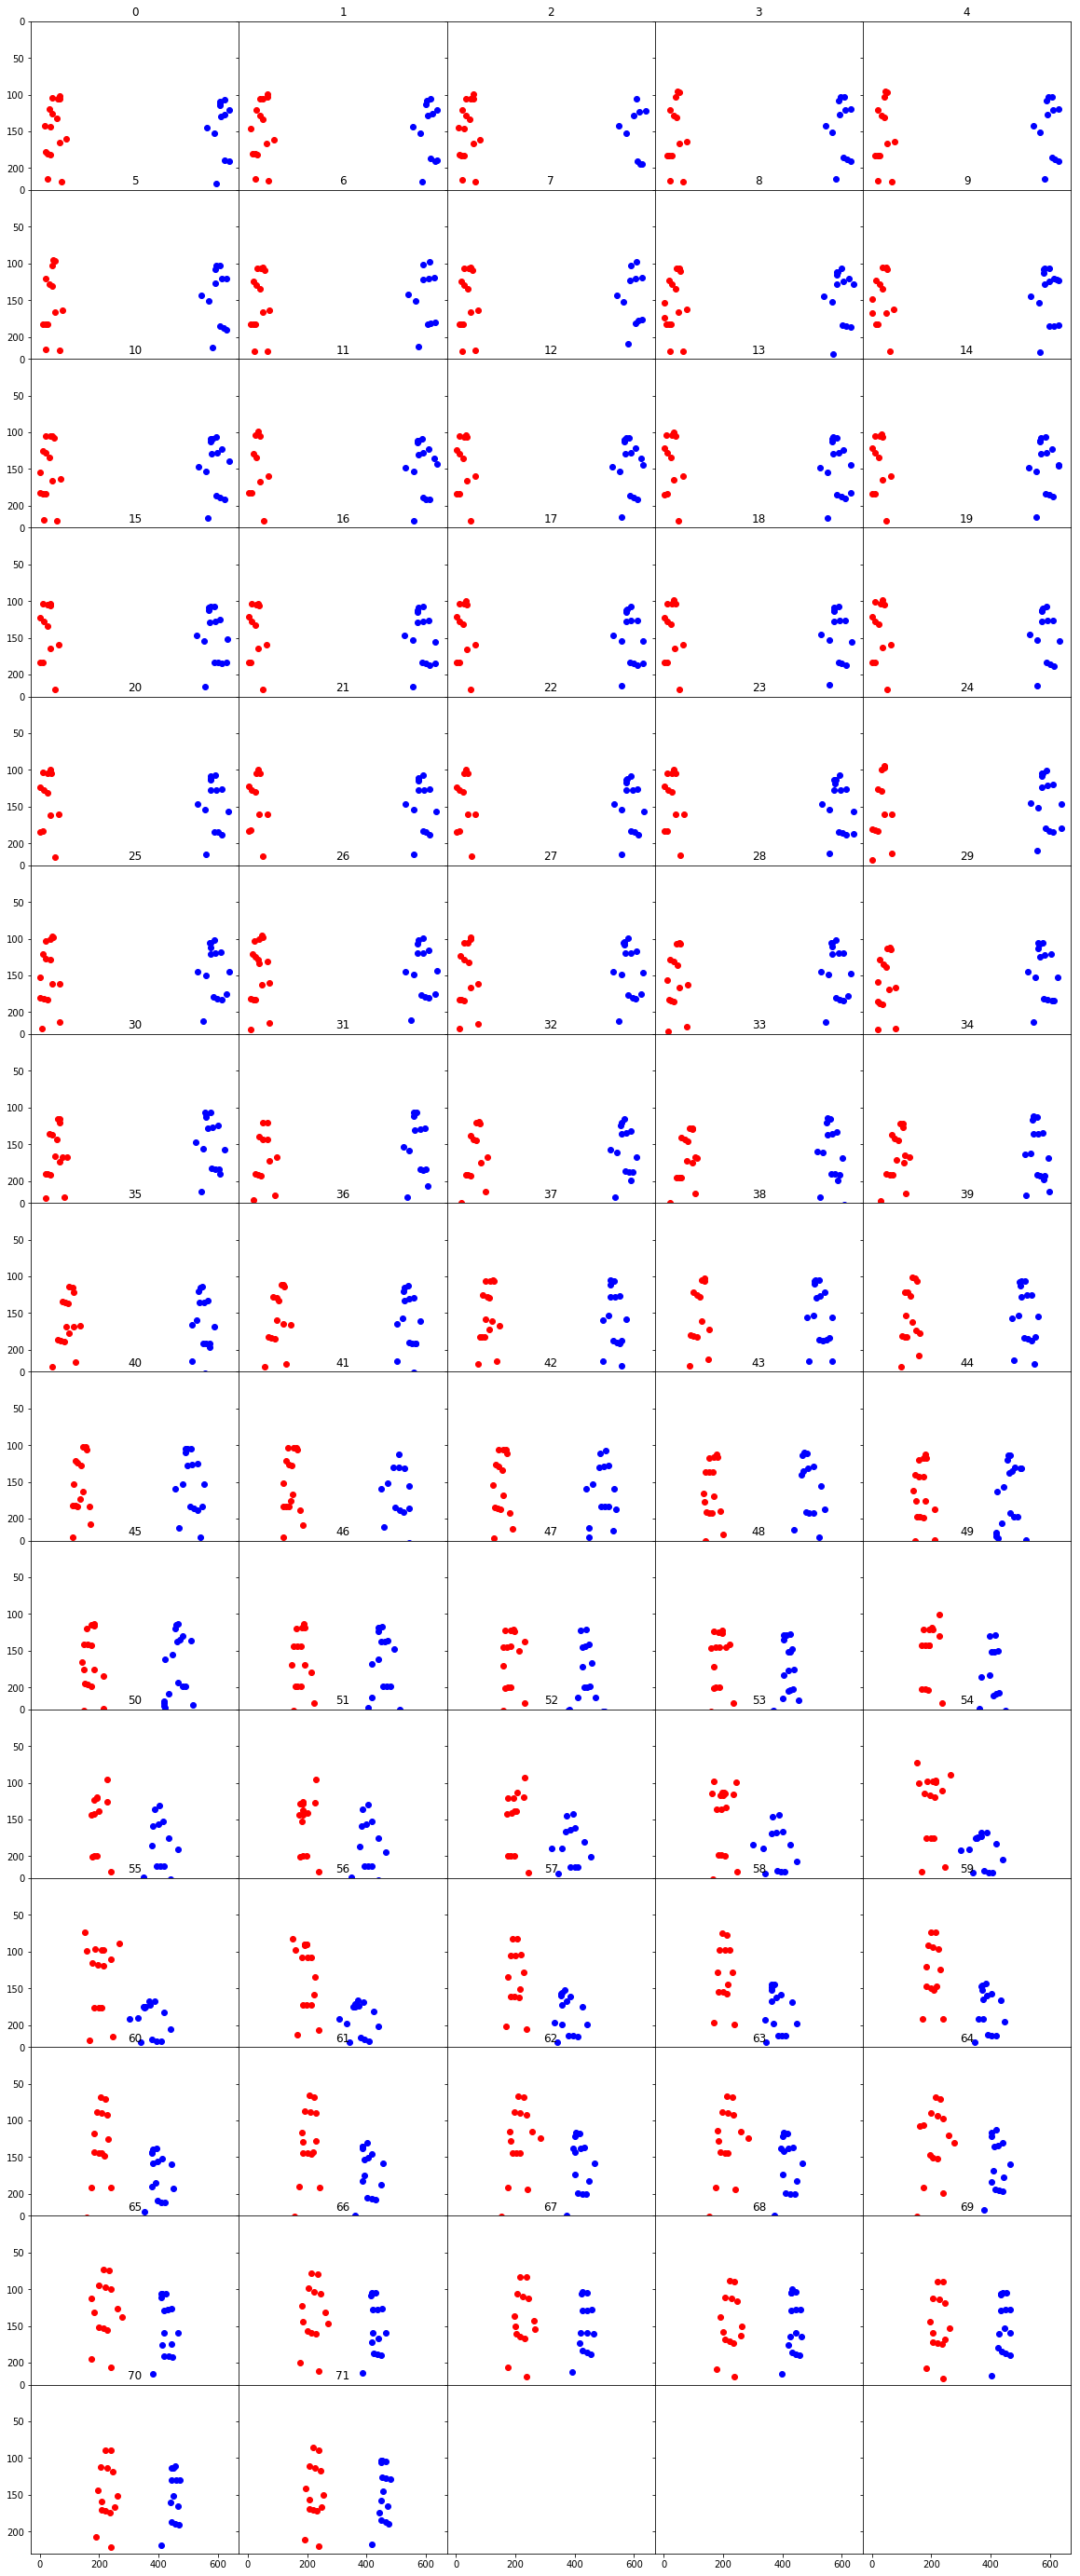

idx of start attack ?0
idx of end attack ?0
who initiates attack ? (left or right)0
0001_002_02_02_1


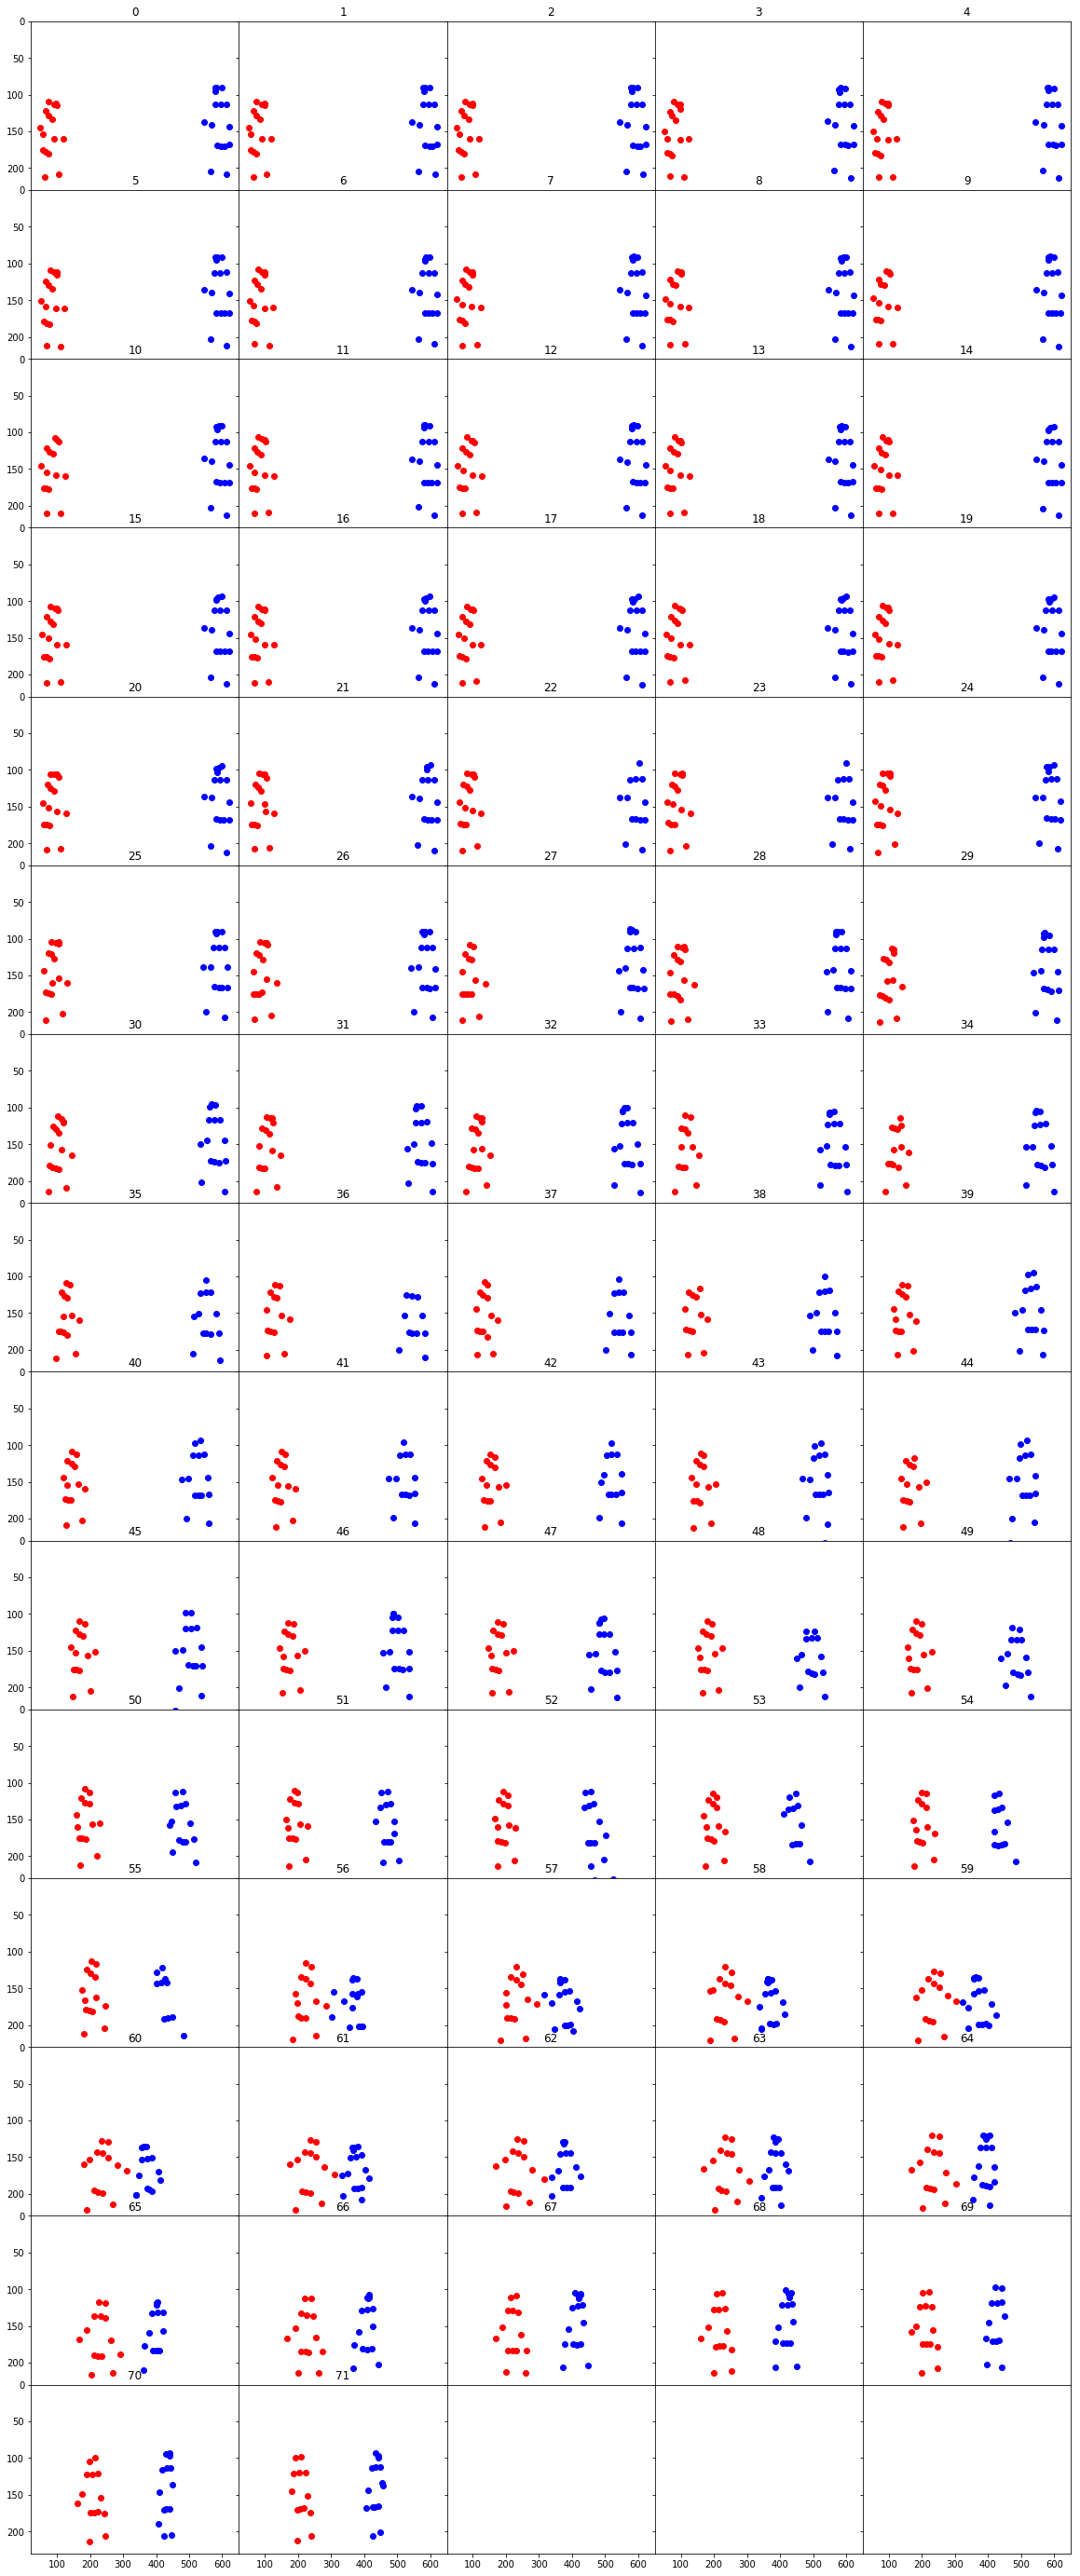

idx of start attack ?0
idx of end attack ?0
who initiates attack ? (left or right)0
0001_002_03_01_1


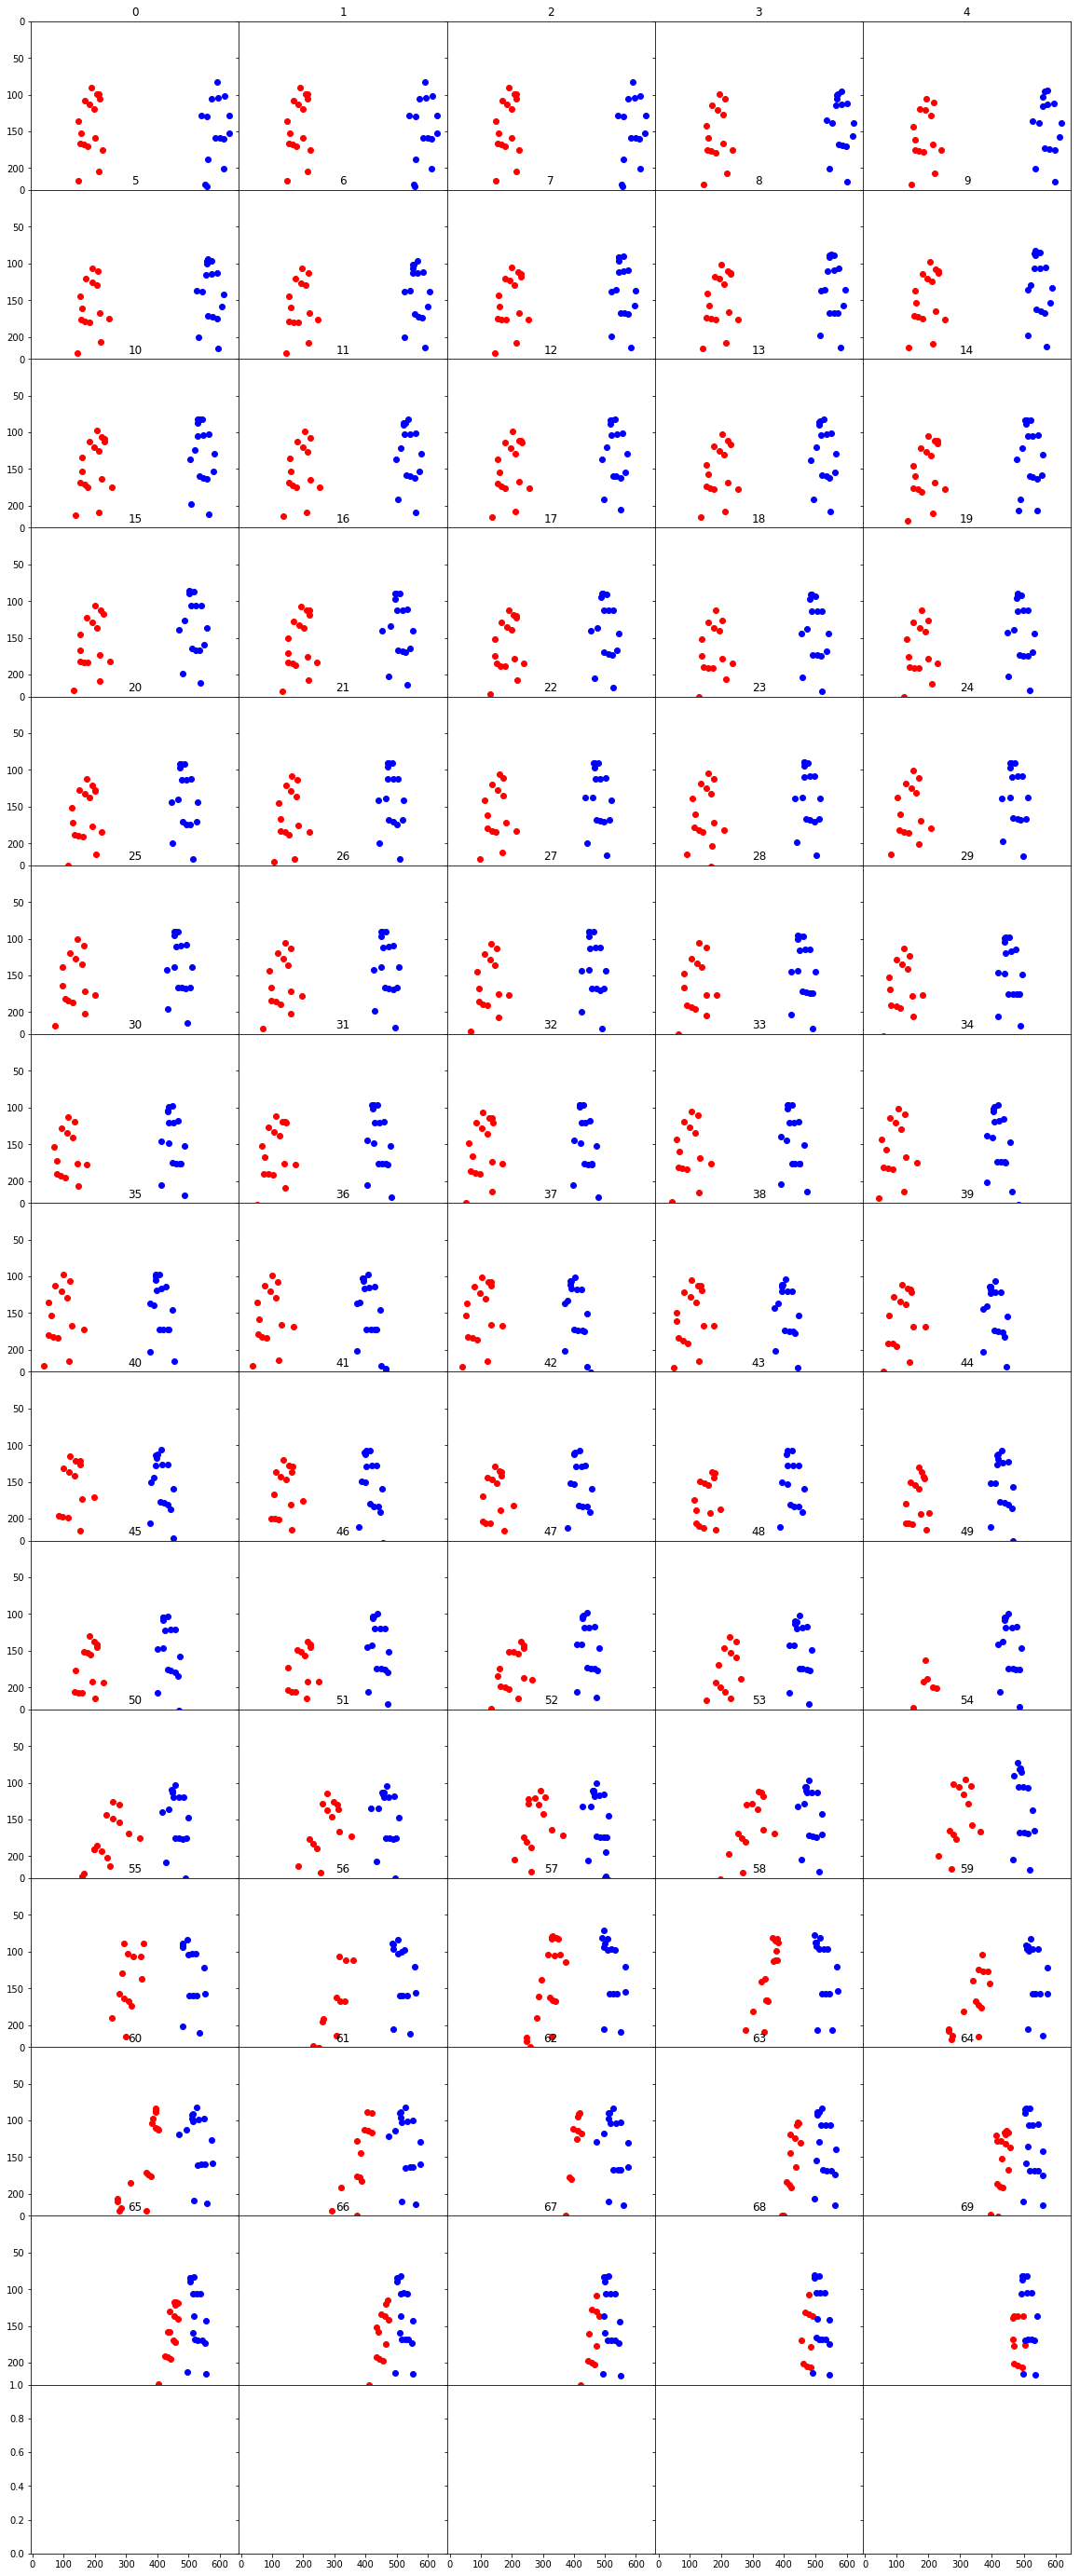

idx of start attack ?45
idx of end attack ?52
who initiates attack ? (left or right)left
0001_002_03_02_1


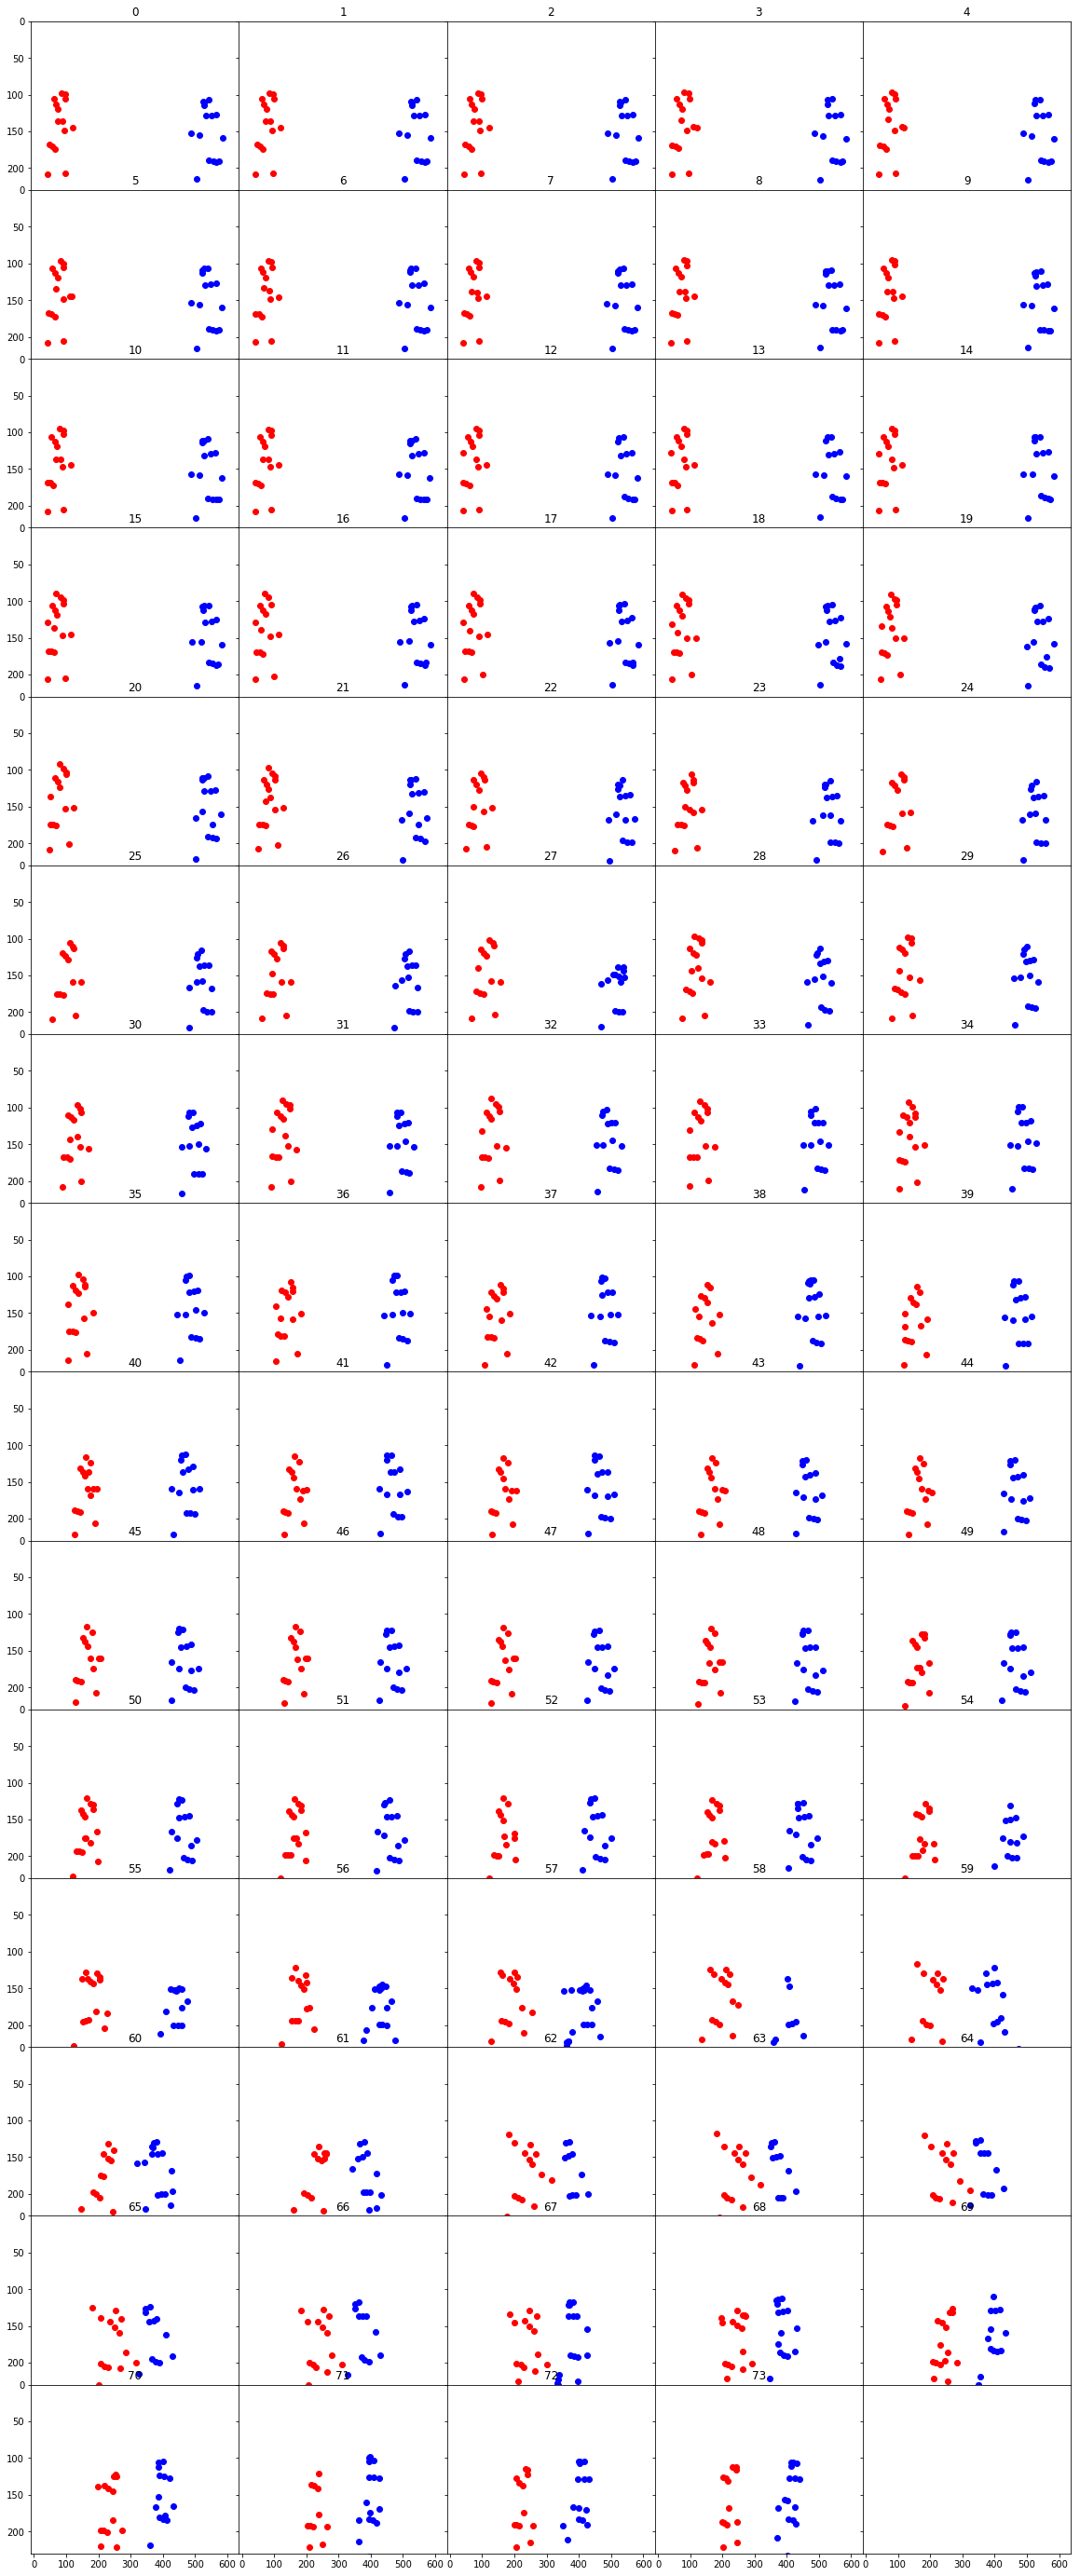

idx of start attack ?55
idx of end attack ?59
who initiates attack ? (left or right)left
0001_002_04_01_1


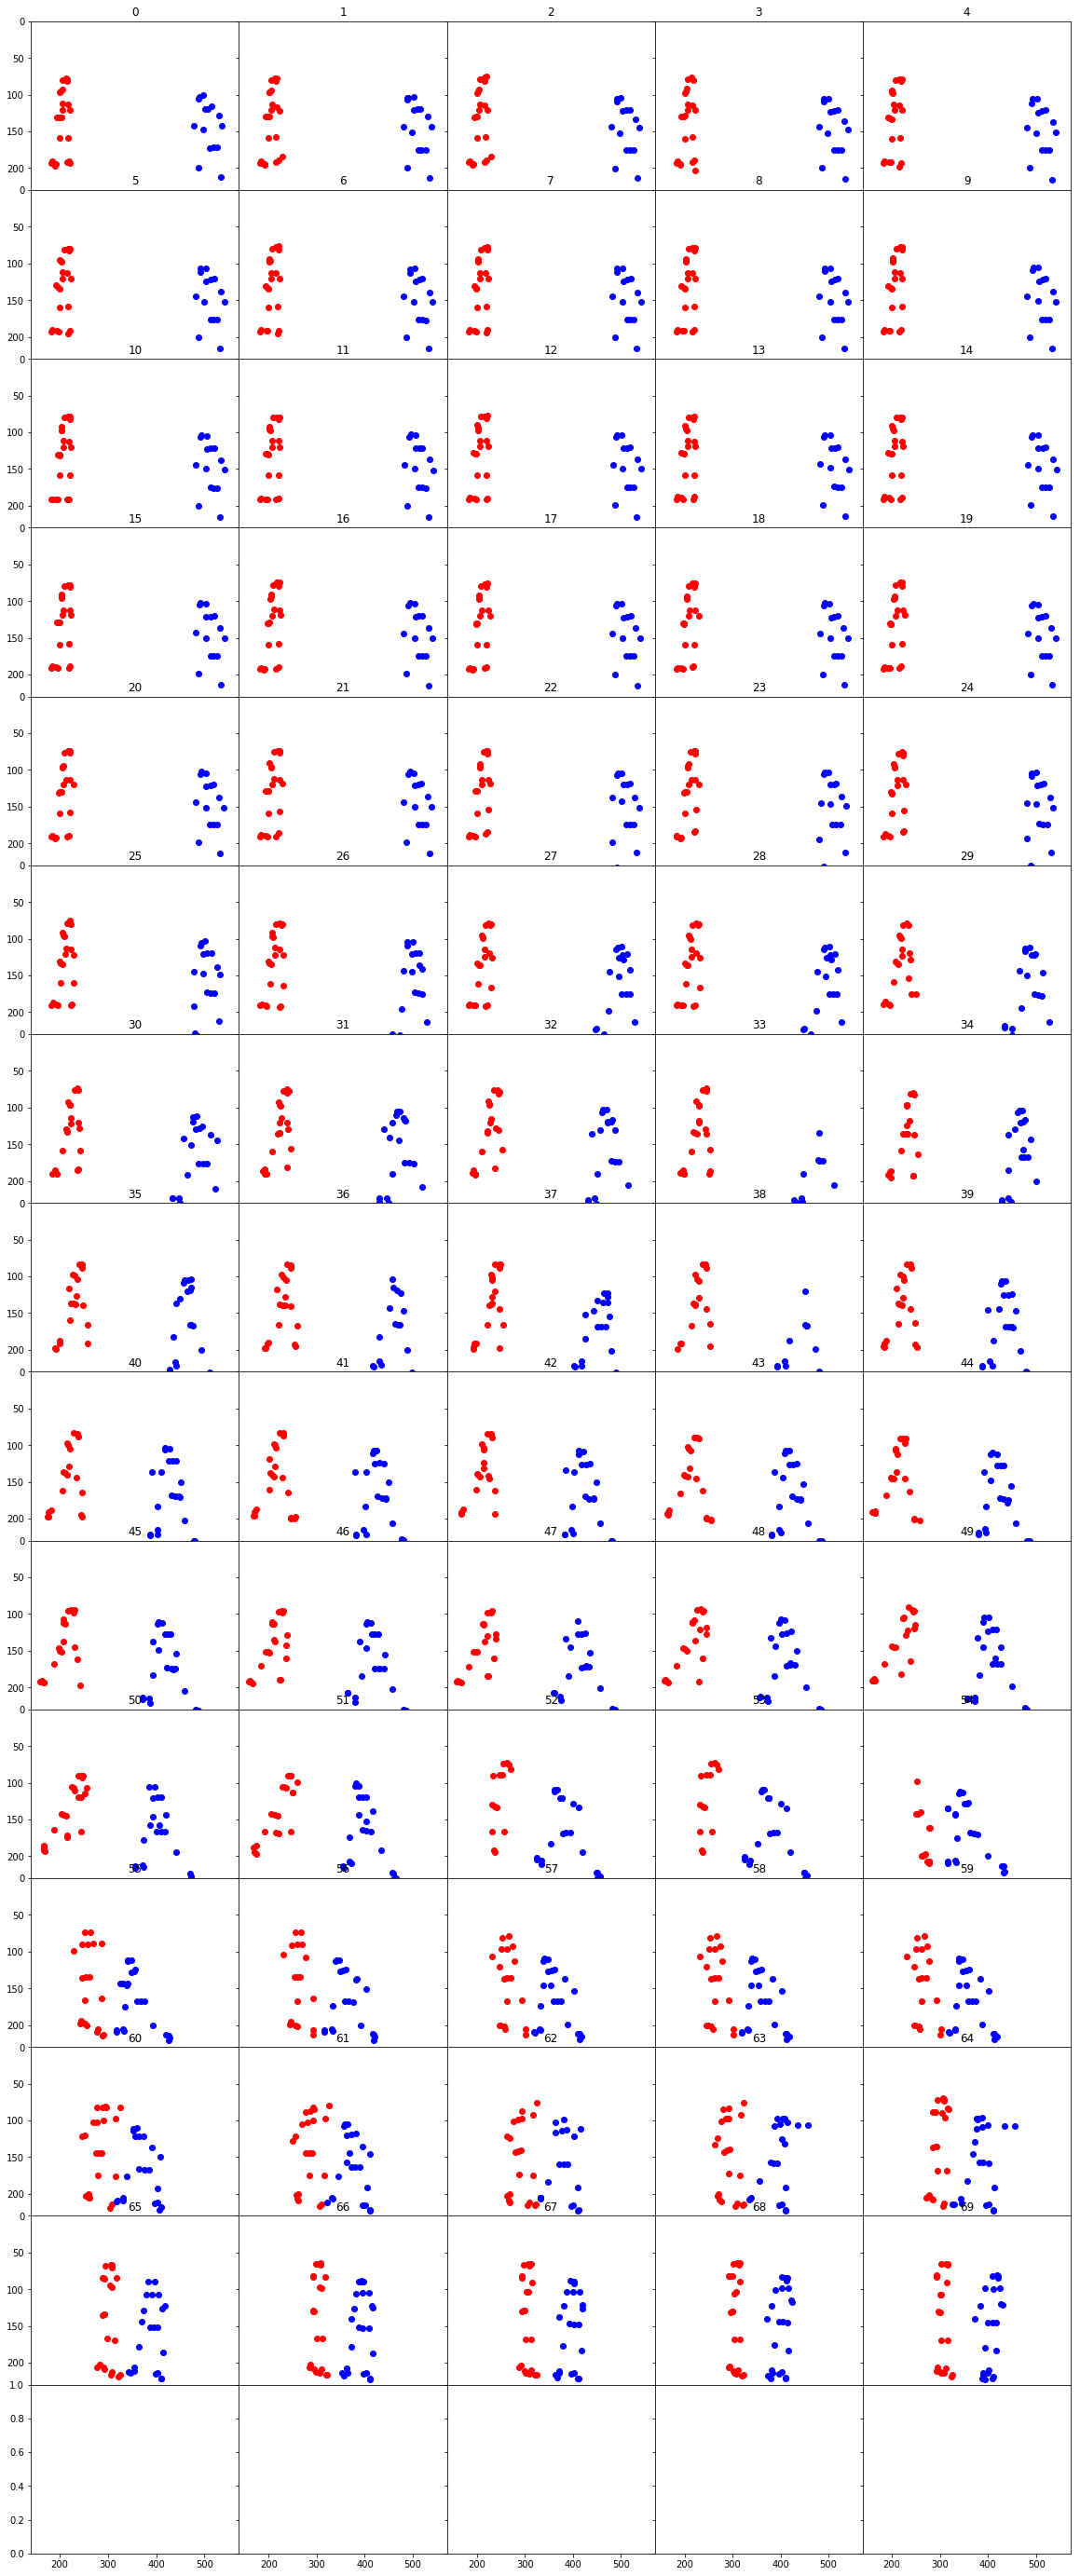

idx of start attack ?52
idx of end attack ?56
who initiates attack ? (left or right)right
0001_002_04_02_1


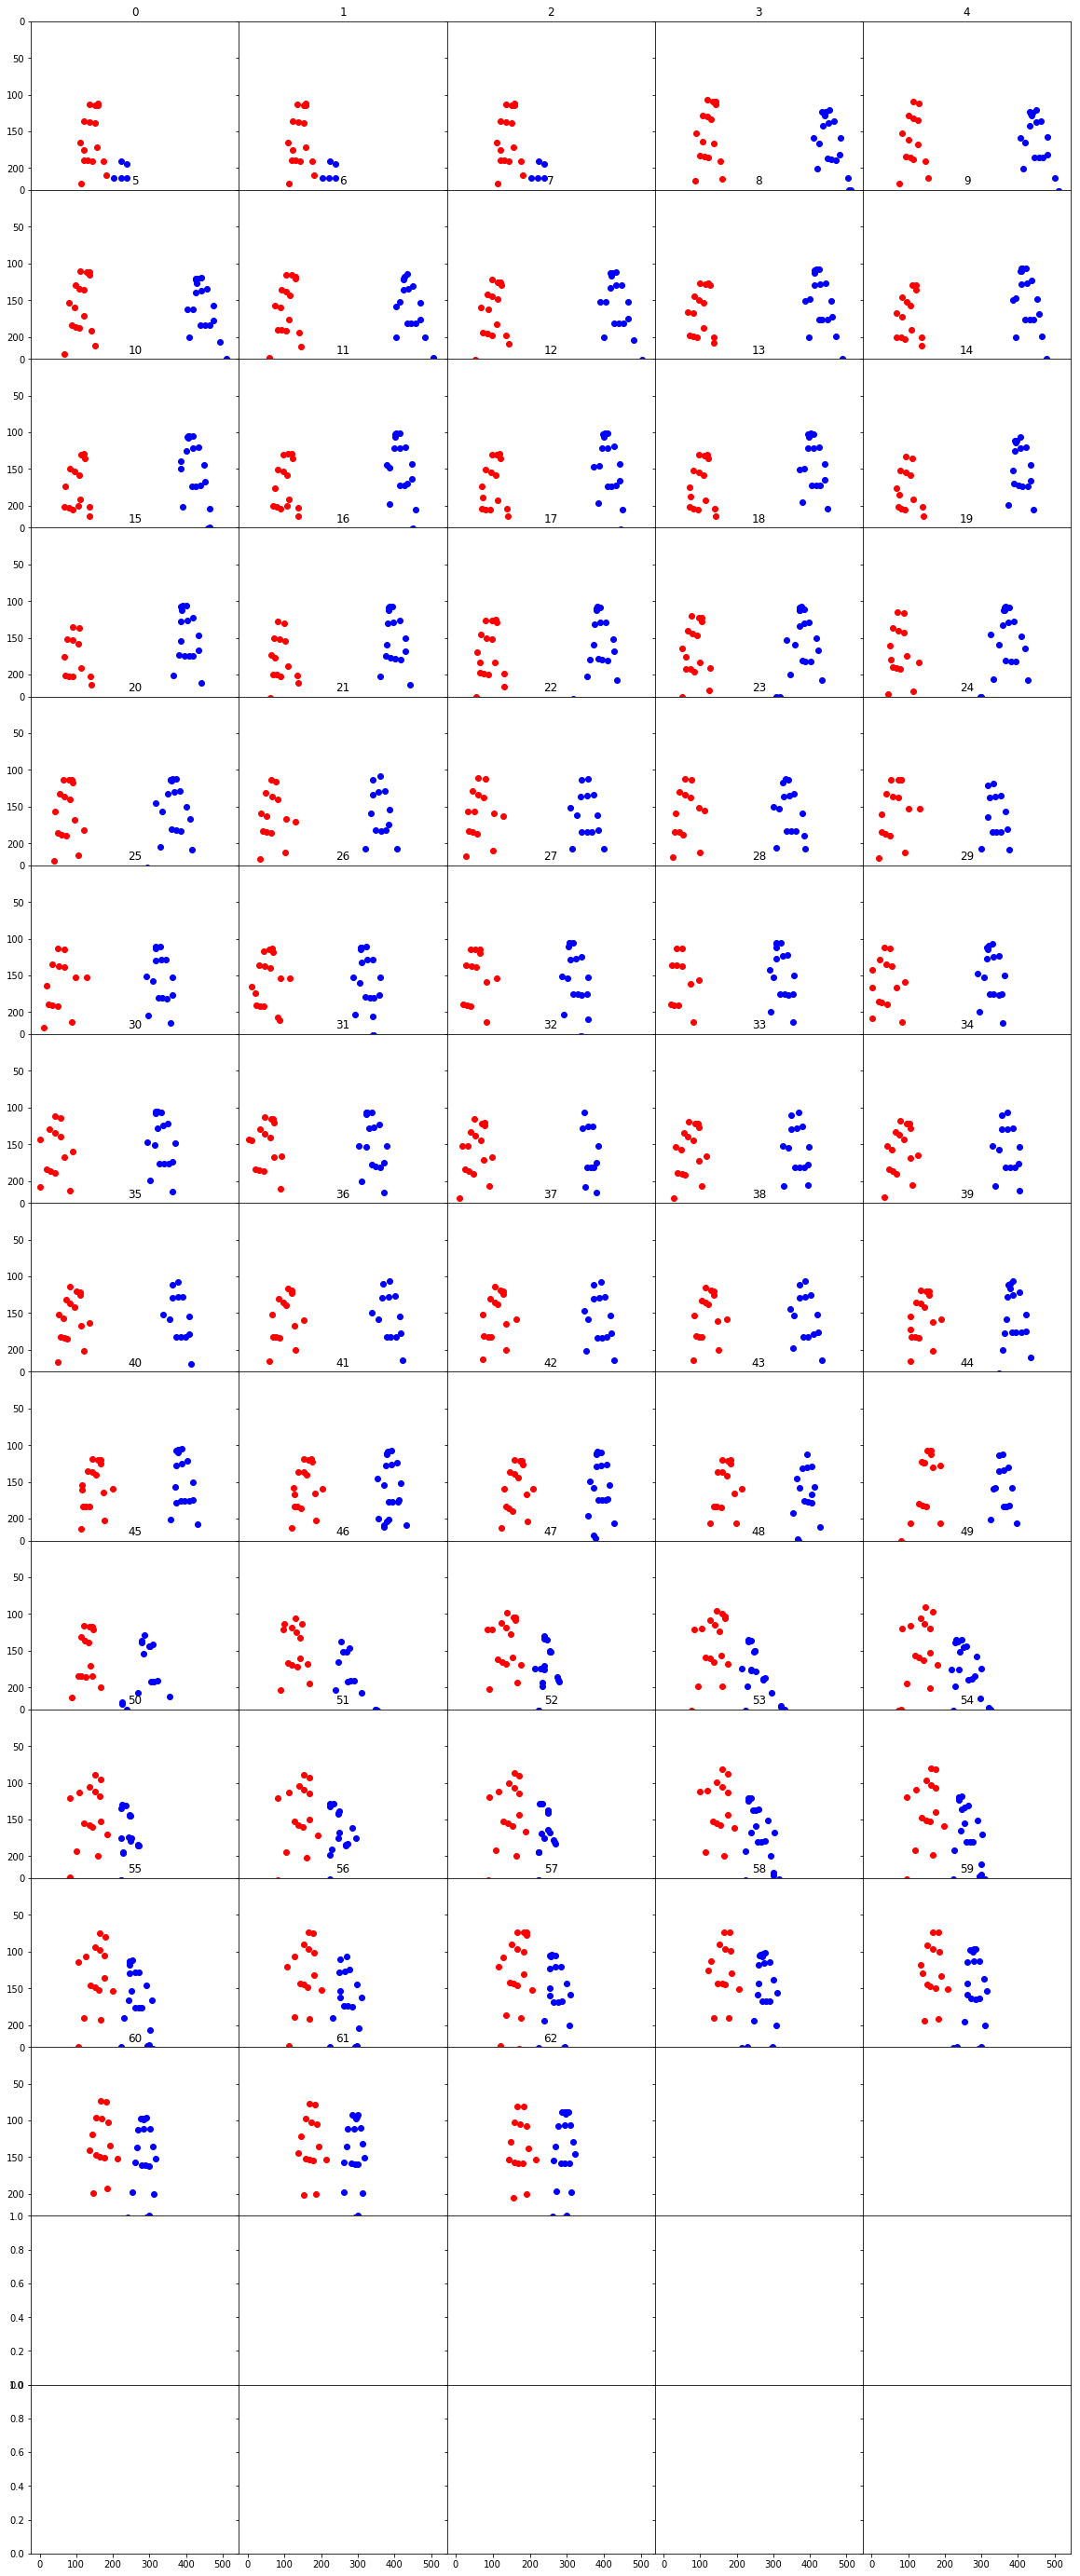

idx of start attack ?44
idx of end attack ?46
who initiates attack ? (left or right)right
0001_002_05_01_1


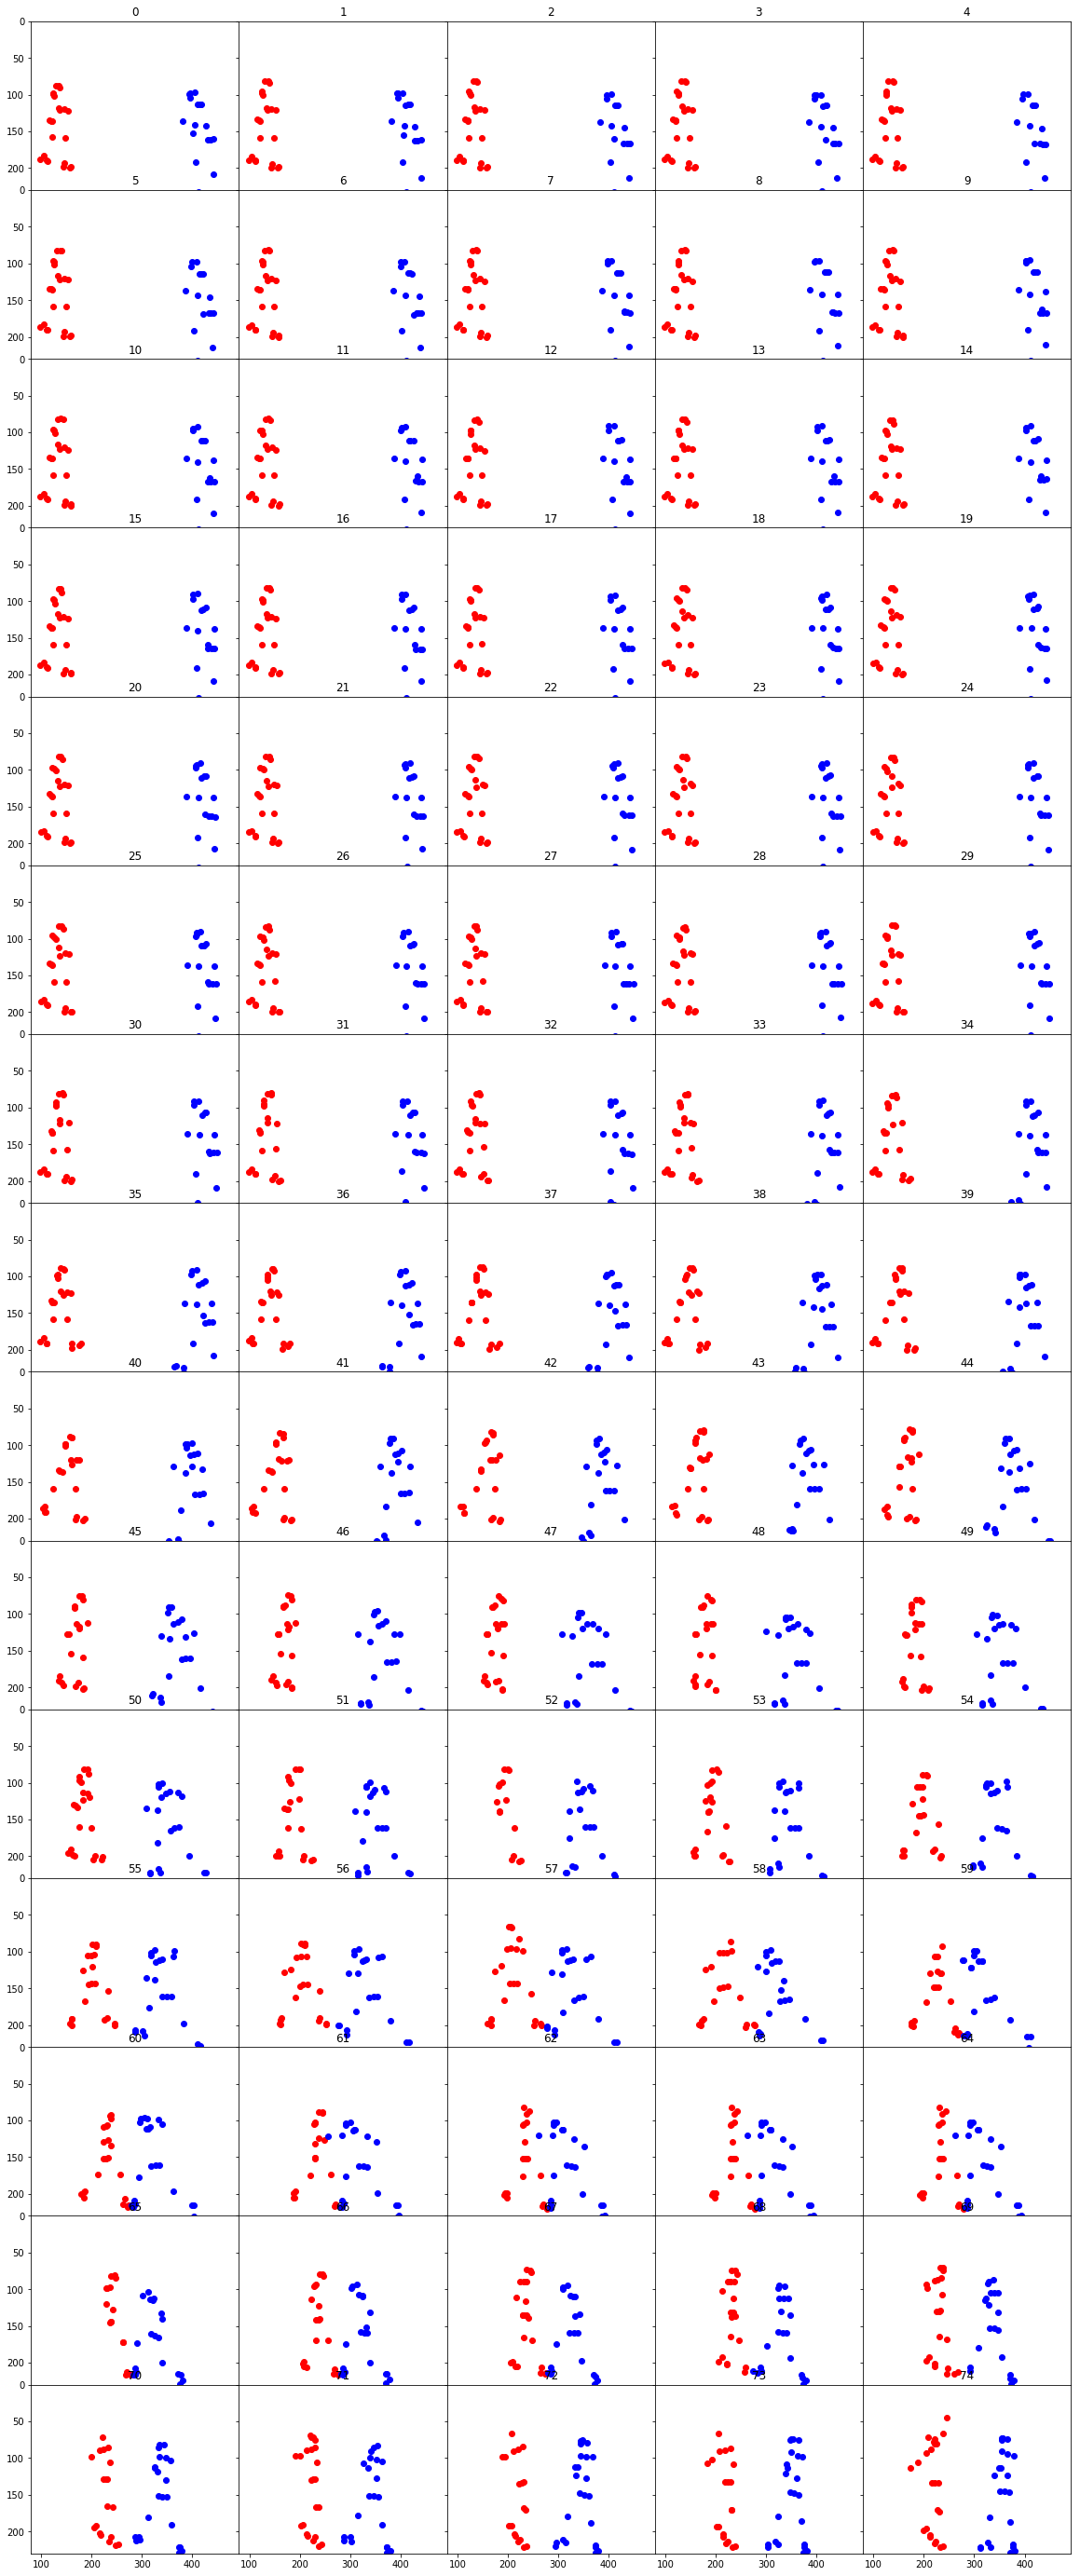

idx of start attack ?54
idx of end attack ?60
who initiates attack ? (left or right)right
0001_002_05_02_1


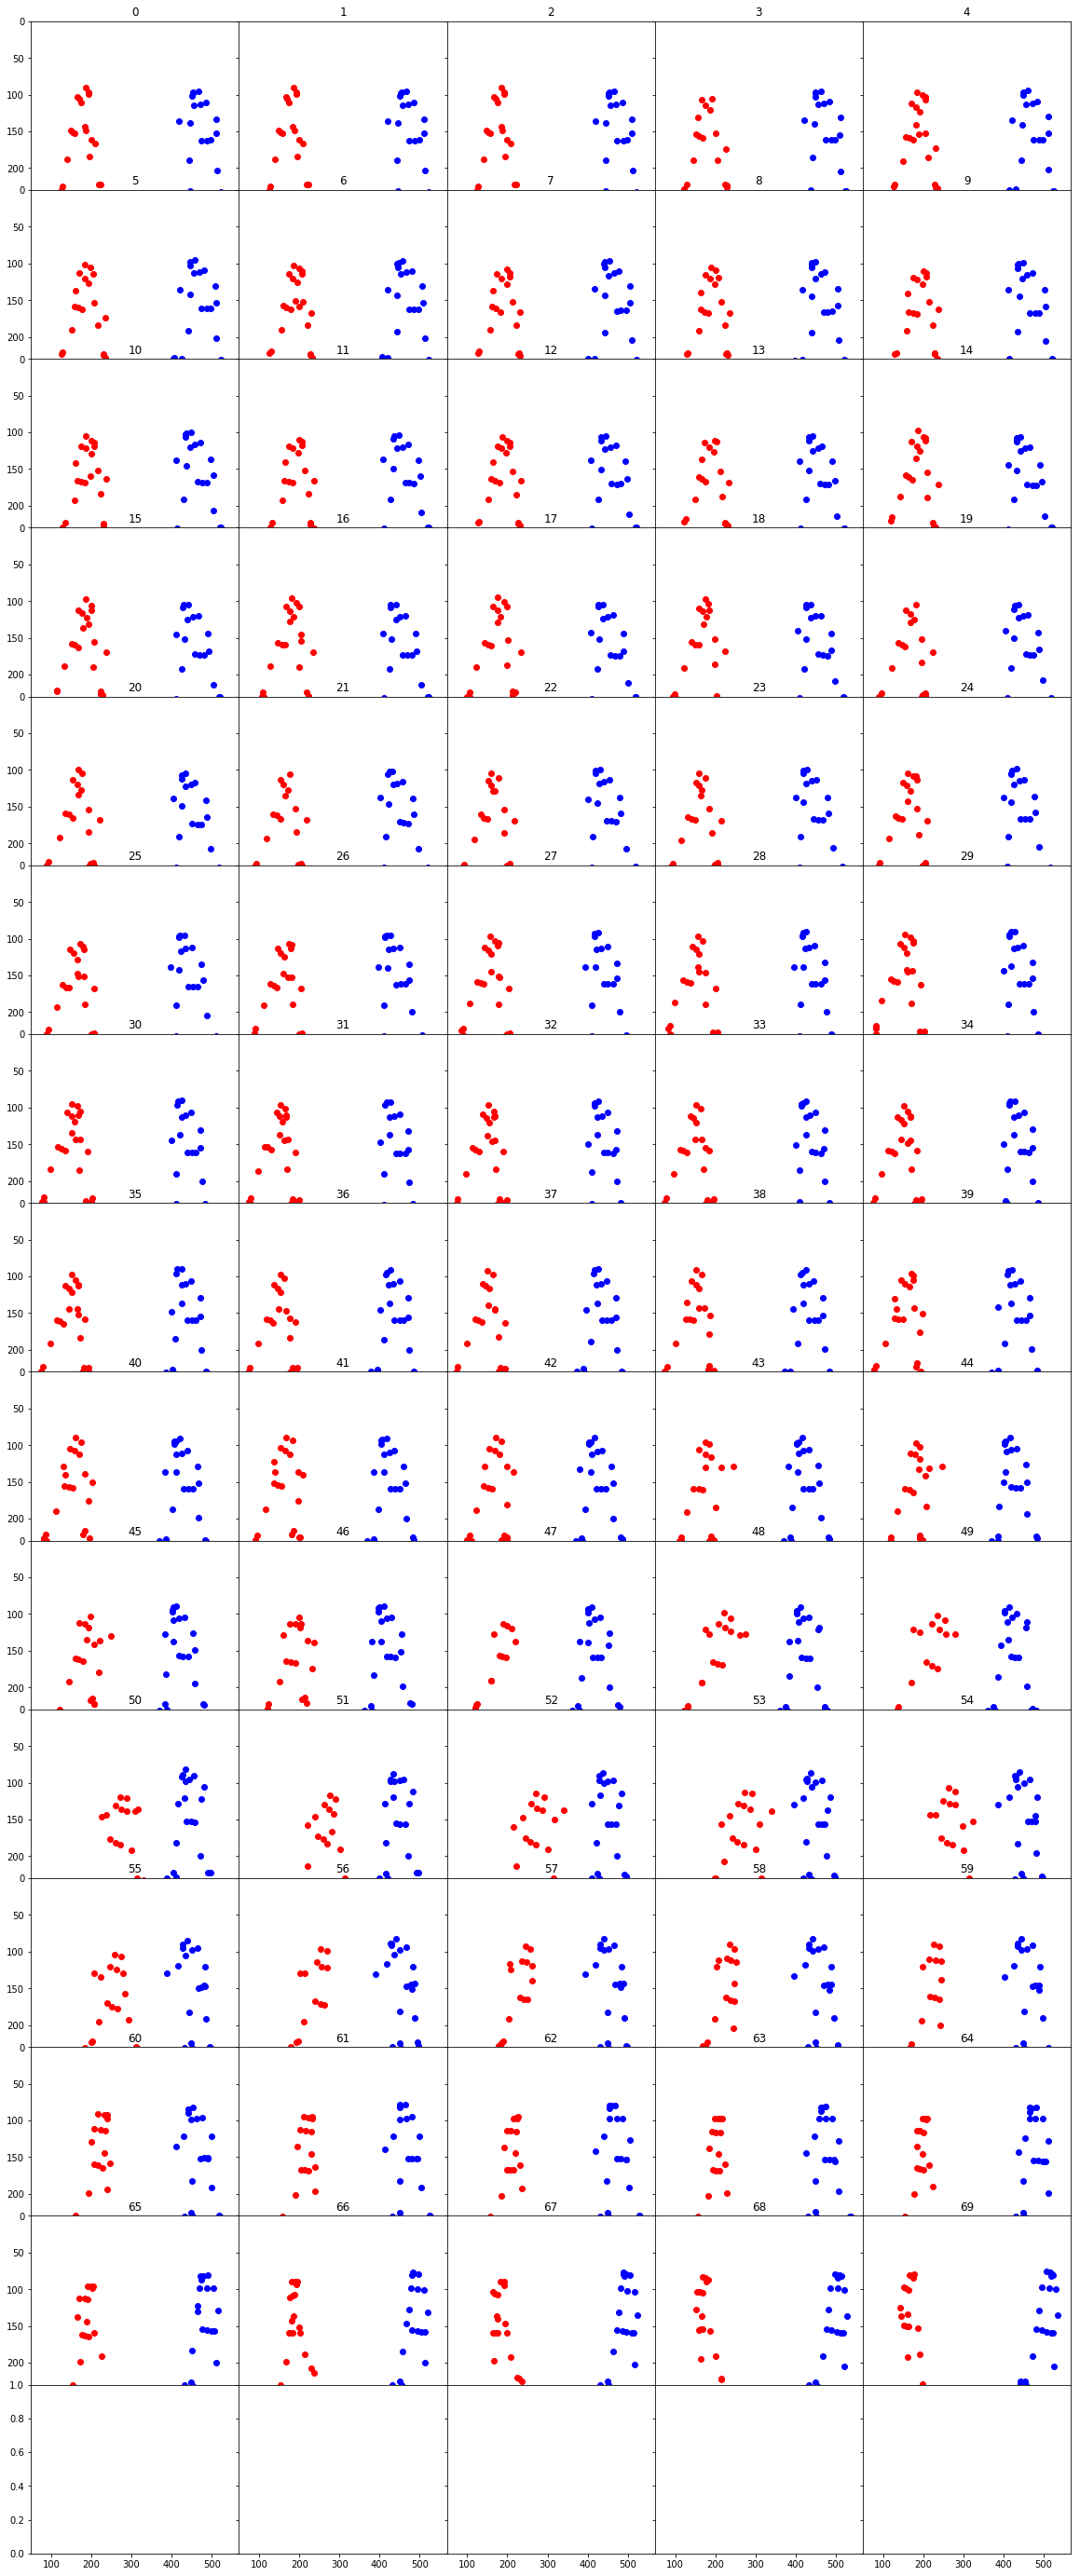

idx of start attack ?0
idx of end attack ?0
who initiates attack ? (left or right)0
0001_002_06_01_1


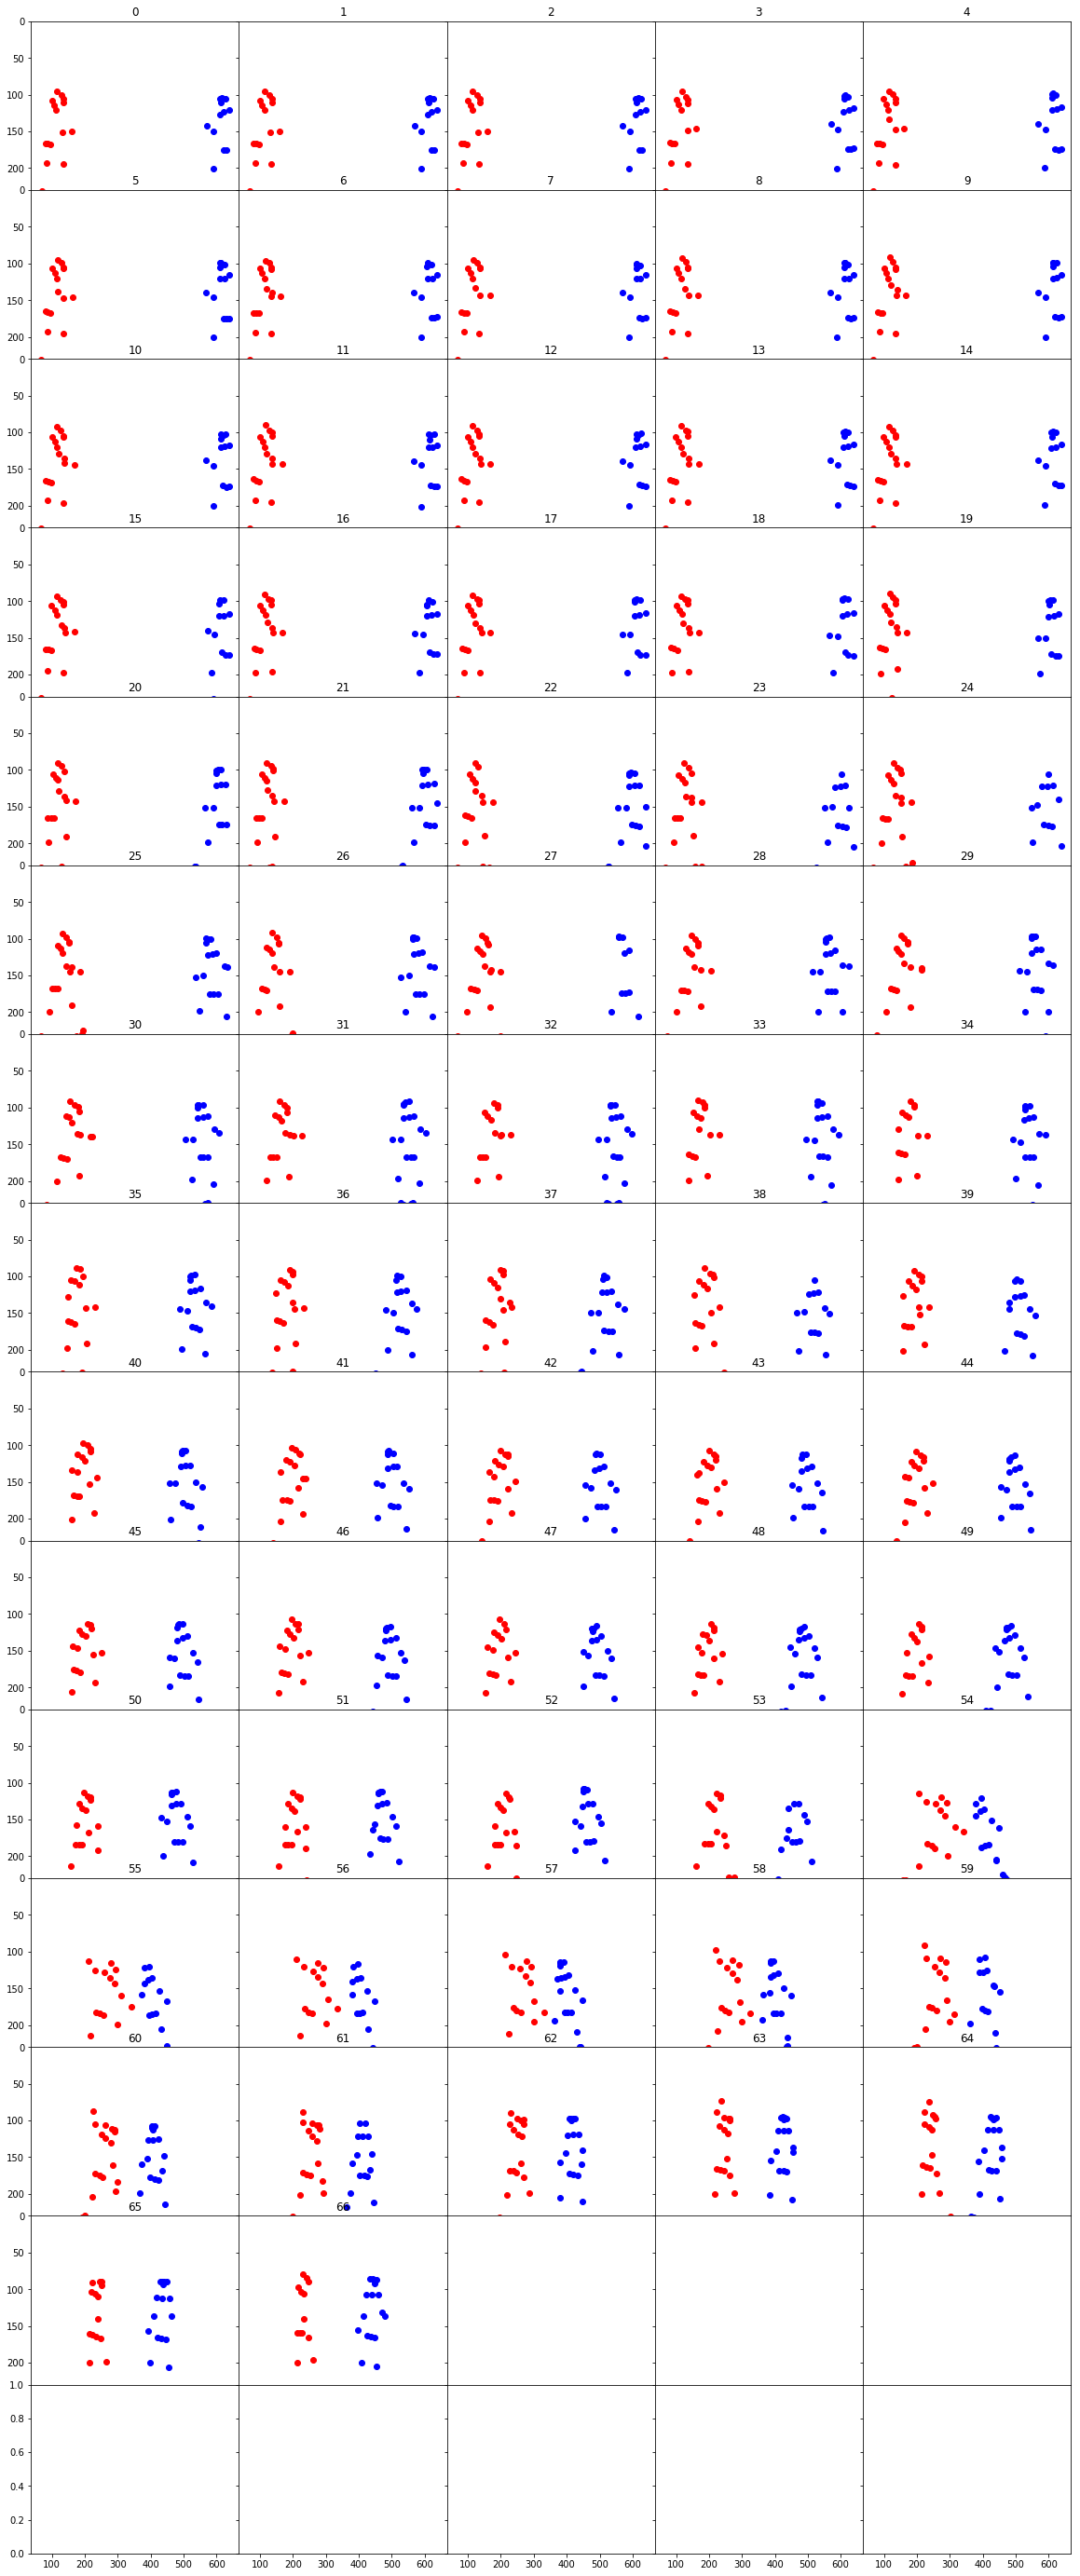

idx of start attack ?0
idx of end attack ?0
who initiates attack ? (left or right)0
0001_002_06_02_1


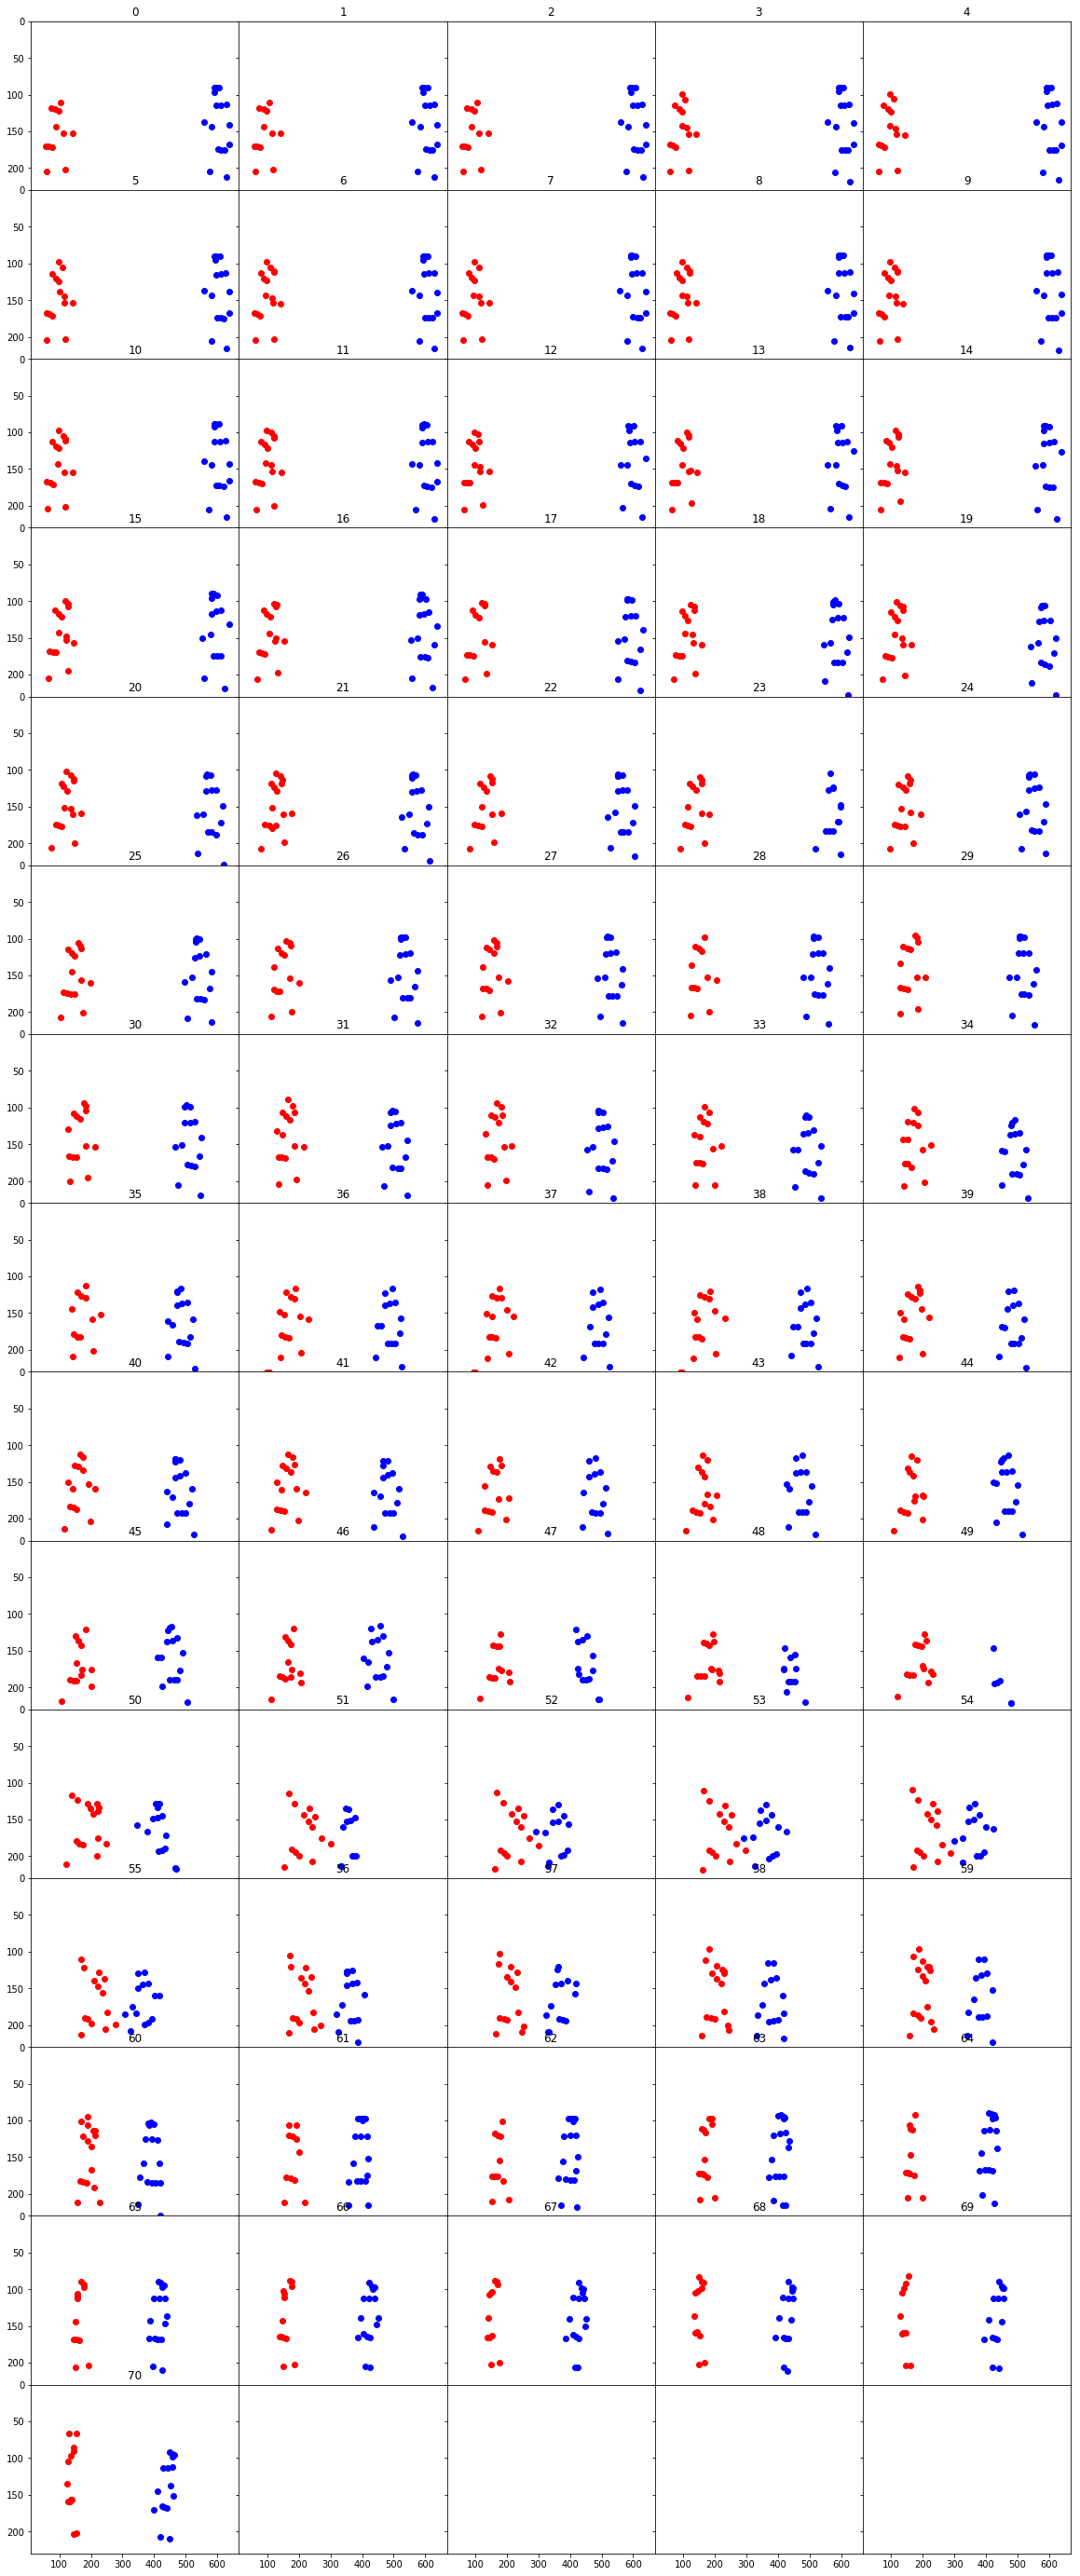

KeyboardInterrupt: 

In [18]:
N_col = 5
N_row = 15
    
for clipname in df.ClipName.unique():
    print(clipname)
    df_kp = load_key_point('./data/Kaggle/FencersKeyPoints/{}.json'.format(clipname))
    
    f, axs = plt.subplots(N_row, N_col, sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0})
    f.set_figwidth(20)
    f.set_figheight(50)
    
    plot_all_from_clip(df_kp)
    plt.show()
    start = input("idx of start attack ?")
    end = input("idx of end attack ?")
    who = input("who initiates attack ? (left or right)")
    df[df.ClipName == clipname]["start"] = int(start)
    df[df.ClipName == clipname]["end"] = int(end)
    df[df.ClipName == clipname]["who"] = who.lower()

In [ ]:
# 1ere a corriger : 44 au lieu de 49'

In [20]:
df

,id,ClipName,URL,Start_frame,End_frame,Light1,Light2,Hit_label
0,1,0001_002_00_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,22750.0,22825.0,2,2,0-0-1
1,2,0001_002_00_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,24684.0,24759.0,2,2,1-0-0
2,3,0001_002_01_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,27330.0,27405.0,2,1,1-0-0
3,4,0001_002_01_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,28051.0,28126.0,2,2,0-0-1
4,5,0001_002_02_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,34040.0,34115.0,2,2,0-0-1
5,6,0001_002_03_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,38708.0,38783.0,2,2,0-0-1
6,7,0001_002_03_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,39581.0,39656.0,2,2,0-0-1
7,8,0001_002_04_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,51090.0,51165.0,2,2,0-0-1
8,9,0001_002_04_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,51402.0,51477.0,2,2,0-0-1
9,10,0001_002_05_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,62596.0,62671.0,2,2,1-0-0
